# 征信-申请评分建模

## Load library

In [1]:
# featuretools for automated feature engineering
#Featuretools是一个开源库，用来实现自动化特征工程。
#它是一个很好的工具，旨在加快特征生成的过程，从而让大家有更多的时间专注于构建机器学习模型的其他方面。
#换句话说，它使你的数据处于“等待机器学习”的状态。
#import featuretools as ft

In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #set style as seaborn
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix
from sklearn.model_selection import train_test_split
import random
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.cluster import KMeans,MiniBatchKMeans

plt.rcParams['font.family'] = 'SimHei' 

import pickle

## Load Data

In [39]:
## D:\study\notebook\2019厦门国际银行“数创金融杯”数据建模大赛\data
path = r'D:\study\notebook\2019厦门国际银行“数创金融杯”数据建模大赛\data\\'

train_x_file = path + 'train.csv'
train_target_file = path + 'train_target.csv'
test_x_file = path + 'test.csv'

def load_data():
    train_x = pd.read_csv(train_x_file, low_memory = False)
    train_y = pd.read_csv(train_target_file,low_memory = False)
    test_x = pd.read_csv(test_x_file,  low_memory = False)
    return train_x,train_y,test_x


train_x,train_y,test_x = load_data()
#data = train_x.merge(train_y, on='id', how='left')
train_x.replace(np.NaN,0,inplace=True)
train_x.replace(-999,0,inplace=True)
test_x.replace(-999,0,inplace=True)

train_x.head()

,id,certId,loanProduct,gender,age,dist,edu,job,lmt,basicLevel,...,highestEdu,linkRela,setupHour,weekday,ncloseCreditCard,unpayIndvLoan,unpayOtherLoan,unpayNormalLoan,5yearBadloan,isNew
0,1,640582,1,2,27,640500,0,8,5.963,3,...,0,0,9,6,1,0,1,0,0,1
1,2,621023,2,2,25,640600,0,3,6.467,3,...,99,11,6,5,1,0,1,0,0,1
2,3,641283,1,2,37,641200,70,5,0.596,1,...,70,0,1,6,0,0,0,0,0,1
3,4,340821,3,2,29,340821,0,4,6.300,3,...,0,0,13,6,1,0,1,0,0,1
4,5,732628,2,2,22,732628,0,2,6.700,2,...,99,11,8,3,1,0,1,0,0,1


In [229]:
print(train_x.shape)
print(test_x.shape)

(132029, 104)
(23561, 104)


In [230]:
print(train_x.columns.to_list())

['id', 'certId', 'loanProduct', 'gender', 'age', 'dist', 'edu', 'job', 'lmt', 'basicLevel', 'x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78', 'certValidBegin', 'certValidStop', 'bankCard', 'ethnic', 'residentAddr', 'highestEdu', 'linkRela', 'setupHour', 'weekday', 'ncloseCreditCard', 'unpayIndvLoan', 'unpayOtherLoan', 'unpayNormalLoan', '5yearBadloan', 'isNew']


In [6]:
test_x['5yearBadloan'].value_counts()

0    23484
1       77
Name: 5yearBadloan, dtype: int64

In [ ]:
#-999	

##  EDA

### 检查target变量的分布

正常贷款： 99.27 % of the dataset
逾期贷款： 0.73 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Default || 1: Default)')

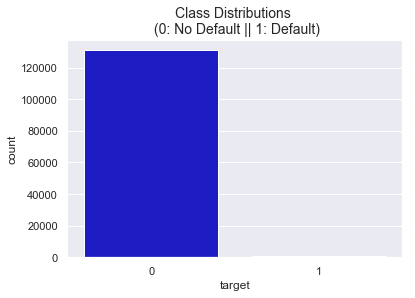

In [12]:
# The classes are heavily skewed we need to solve this issue later.
print('正常贷款：', round(train_y['target'].value_counts()[0]/len(train_y) * 100,2), '% of the dataset')
print('逾期贷款：', round(train_y['target'].value_counts()[1]/len(train_y) * 100,2), '% of the dataset')

colors = ["#0101DF", "#DF0101"]

sns.countplot('target', data=train_y, palette=colors)
plt.title('Class Distributions \n (0: No Default || 1: Default)', fontsize=14)

### 检查训练集合测试集中的缺失值

In [13]:
print("train dataset NA missing values:",train_x.isna().sum().sum())
print("test dataset NA missing values:",test_x.isna().sum().sum())

train dataset NA missing values: 0
test dataset NA missing values: 0


In [14]:
train_x.bankCard.isnull().sum().sum()

0

### 检查特征的取值情况

In [15]:
#train_x.x_0.value_counts()
train_x['x_0'].value_counts()#.shape[0]

 0      131718
-999       311
Name: x_0, dtype: int64

In [16]:
col =  train_x.columns.to_list()
col.remove('id')
col.remove('certId')
for c in col:
    cnt = train_x[c].value_counts().shape[0]
    print(c, ':', cnt)   

loanProduct : 3
gender : 2
age : 38
dist : 3738
edu : 9
job : 13
lmt : 1718
basicLevel : 6
x_0 : 2
x_1 : 2
x_2 : 2
x_3 : 2
x_4 : 2
x_5 : 2
x_6 : 2
x_7 : 2
x_8 : 2
x_9 : 2
x_10 : 2
x_11 : 2
x_12 : 3
x_13 : 2
x_14 : 3
x_15 : 2
x_16 : 3
x_17 : 2
x_18 : 2
x_19 : 2
x_20 : 3
x_21 : 2
x_22 : 2
x_23 : 2
x_24 : 2
x_25 : 3
x_26 : 3
x_27 : 3
x_28 : 3
x_29 : 3
x_30 : 3
x_31 : 3
x_32 : 3
x_33 : 7
x_34 : 7
x_35 : 3
x_36 : 2
x_37 : 2
x_38 : 2
x_39 : 3
x_40 : 2
x_41 : 3
x_42 : 3
x_43 : 3
x_44 : 3
x_45 : 3
x_46 : 3
x_47 : 3
x_48 : 3
x_49 : 3
x_50 : 3
x_51 : 3
x_52 : 3
x_53 : 3
x_54 : 3
x_55 : 3
x_56 : 3
x_57 : 2
x_58 : 2
x_59 : 2
x_60 : 2
x_61 : 3
x_62 : 3
x_63 : 3
x_64 : 3
x_65 : 3
x_66 : 3
x_67 : 3
x_68 : 3
x_69 : 3
x_70 : 2
x_71 : 3
x_72 : 3
x_73 : 3
x_74 : 3
x_75 : 3
x_76 : 3
x_77 : 2
x_78 : 2
certValidBegin : 5149
certValidStop : 6852
bankCard : 5992
ethnic : 49
residentAddr : 5288
highestEdu : 9
linkRela : 9
setupHour : 24
weekday : 7
ncloseCreditCard : 3
unpayIndvLoan : 3
unpayOtherLoan : 3
unpa

In [63]:
col =  train_x.columns.to_list()
col.remove('id')
col.remove('certId')
for c in col:
    print(c)
    print(train_x[c].value_counts())
    print("------------------------")

loanProduct
2    68822
1    37448
3    25759
Name: loanProduct, dtype: int64
------------------------
gender
2    99843
1    32186
Name: gender, dtype: int64
------------------------
age
27     9079
28     8133
26     7734
24     7719
22     7620
23     7569
25     7550
30     7535
29     7414
21     6714
20     6228
31     5847
32     4937
19     4705
33     4199
34     3908
35     3905
36     2803
37     2457
38     2274
39     1888
40     1634
41     1561
42     1336
43     1318
44     1224
45     1169
46      981
47      856
48      718
18      427
49      270
52       85
50       83
51       81
53       58
54        7
117       3
Name: age, dtype: int64
------------------------
dist
640300    2029
640100    1873
710100    1829
310100    1687
510100    1429
700100     988
641900     902
530100     882
630100     805
810100     777
620100     763
640600     758
640580     742
520500     711
610100     688
730100     615
650100     610
640500     583
640920     563
642000     548
645

Name: x_61, dtype: int64
------------------------
x_62
 1      83986
 0      47732
-999      311
Name: x_62, dtype: int64
------------------------
x_63
 0      87051
 1      44667
-999      311
Name: x_63, dtype: int64
------------------------
x_64
 0      122498
 1        9220
-999       311
Name: x_64, dtype: int64
------------------------
x_65
 0      70116
 1      61602
-999      311
Name: x_65, dtype: int64
------------------------
x_66
 0      103707
 1       28011
-999       311
Name: x_66, dtype: int64
------------------------
x_67
 1      76662
 0      55056
-999      311
Name: x_67, dtype: int64
------------------------
x_68
 0      124343
 1        7375
-999       311
Name: x_68, dtype: int64
------------------------
x_69
 0      131289
 1         429
-999       311
Name: x_69, dtype: int64
------------------------
x_70
 1      131718
-999       311
Name: x_70, dtype: int64
------------------------
x_71
 1      98438
 0      33280
-999      311
Name: x_71, dtype: int64
-----

### 检查二分类变量的好坏样本分布

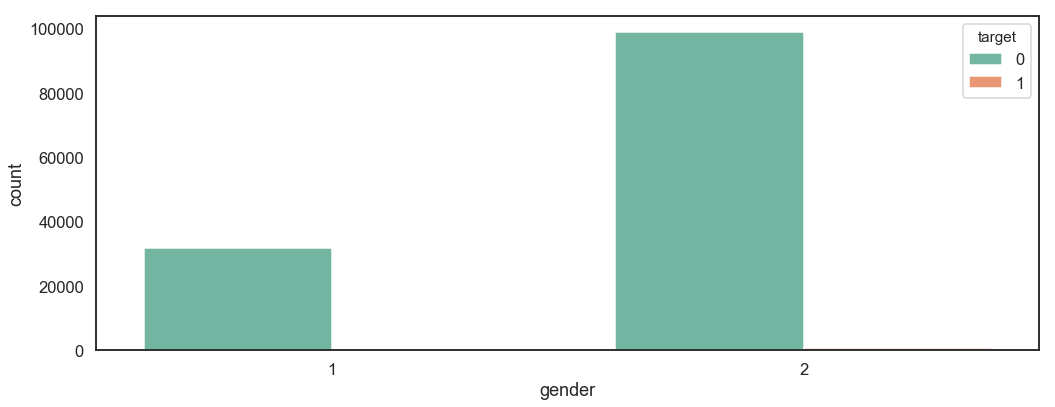

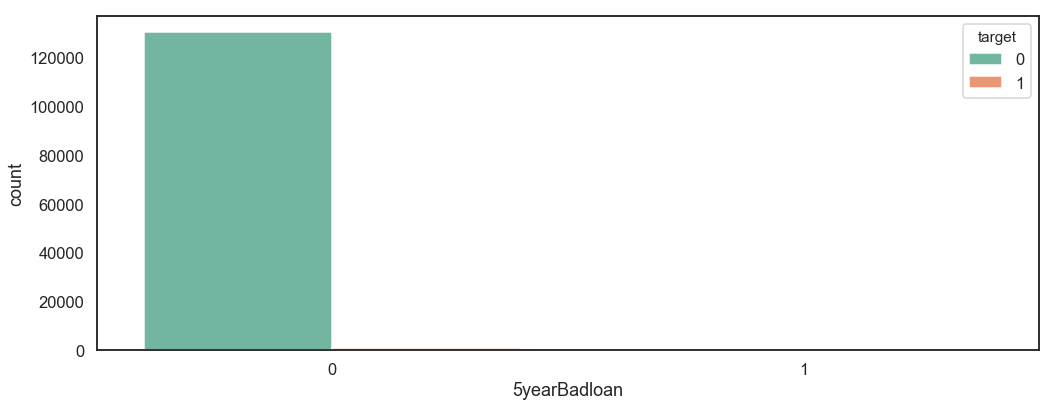

In [58]:
data = train_x.merge(train_y, on='id', how='left')
for col in ['gender', '5yearBadloan']:
    f, ax = plt.subplots(1, 1, figsize=(15,6))
    sns.set(style="white", context="talk")
    sns.countplot(x=col, hue="target", data=data, ax=ax, palette="Set2")
    f.tight_layout()

### 多分类变量取值情况

In [65]:
print(train_x.columns.to_list())

['id', 'certId', 'loanProduct', 'gender', 'age', 'dist', 'edu', 'job', 'lmt', 'basicLevel', 'x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78', 'certValidBegin', 'certValidStop', 'bankCard', 'ethnic', 'residentAddr', 'highestEdu', 'linkRela', 'setupHour', 'weekday', 'ncloseCreditCard', 'unpayIndvLoan', 'unpayOtherLoan', 'unpayNormalLoan', '5yearBadloan', 'isNew']


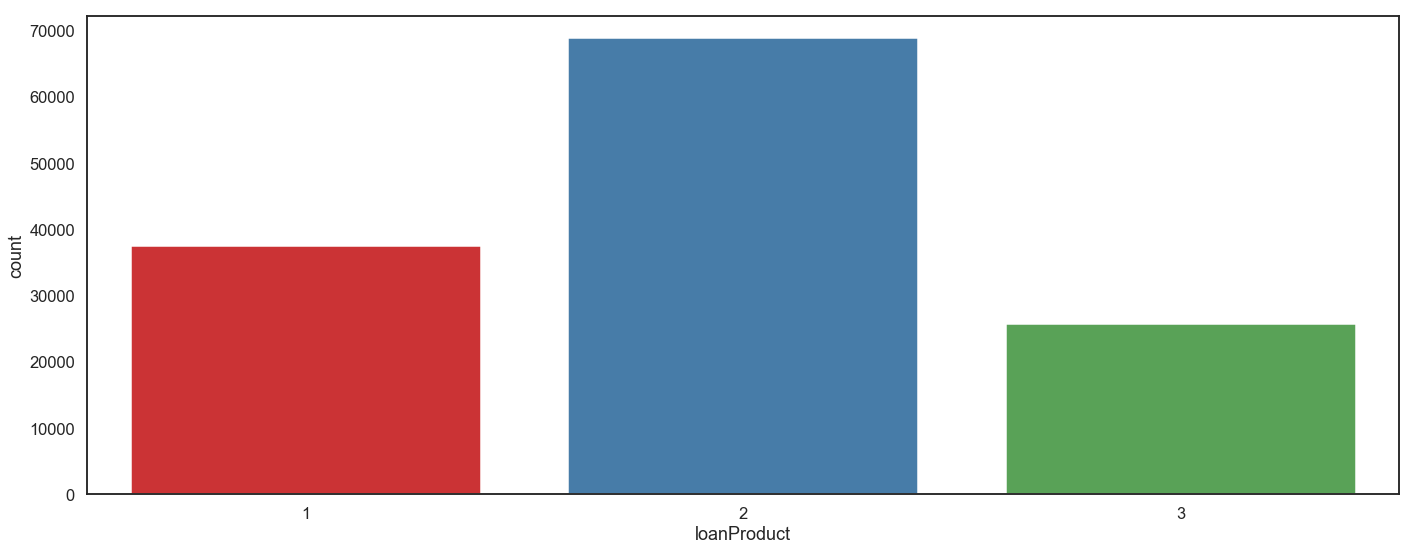

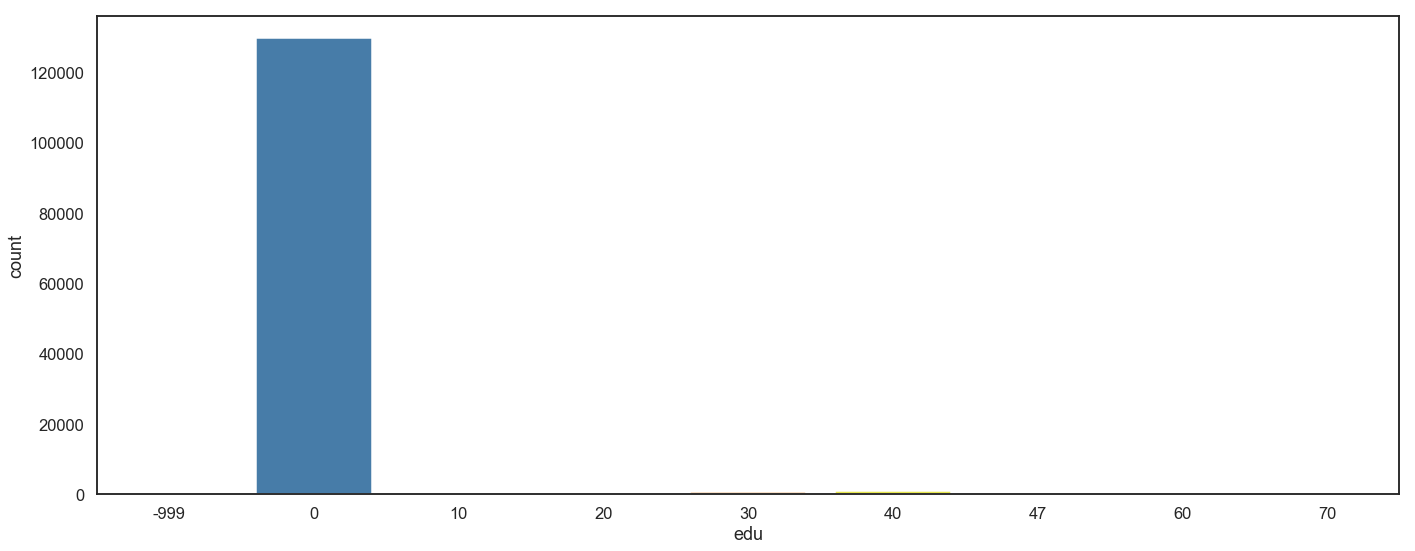

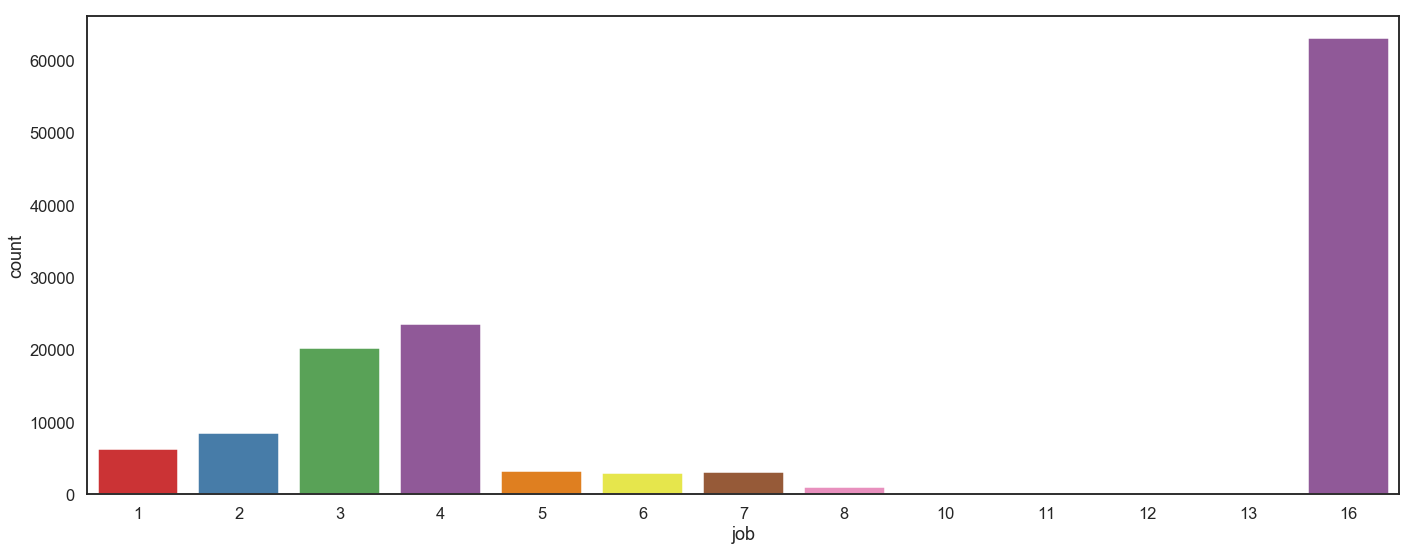

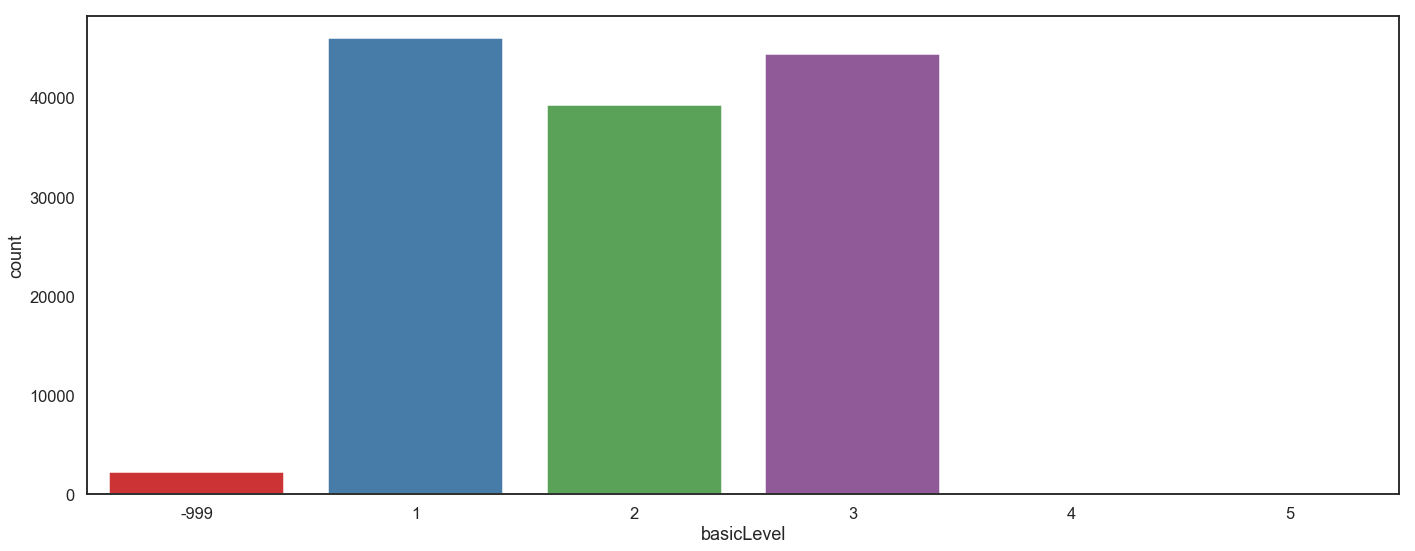

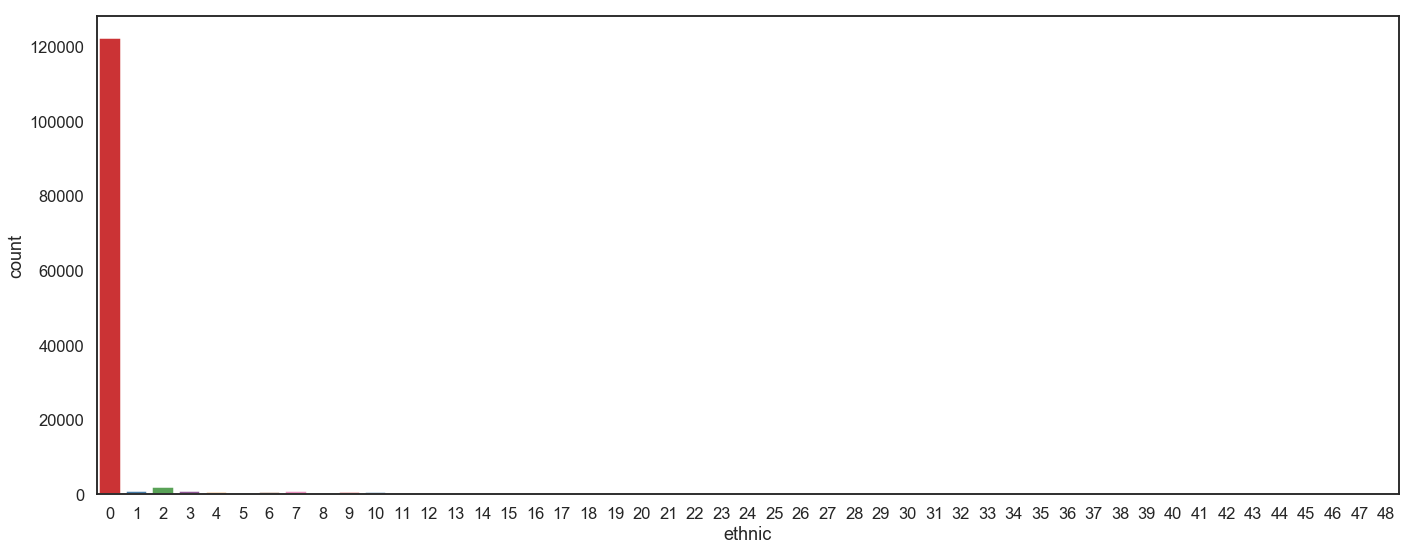

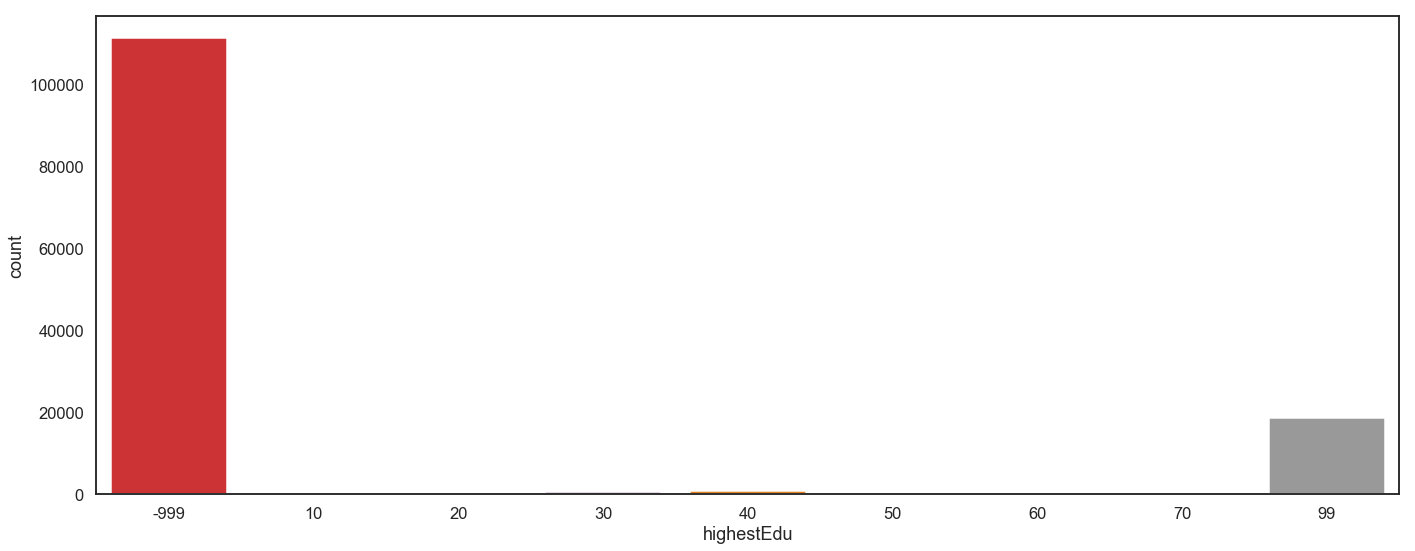

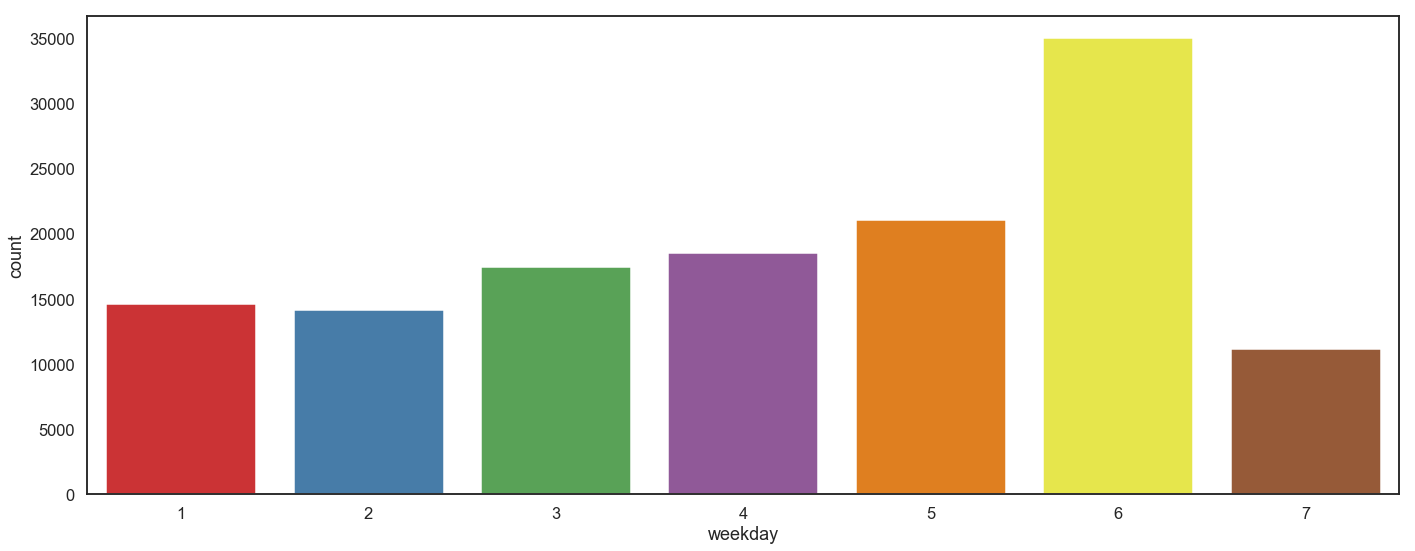

In [67]:
for col in ['loanProduct', 'edu', 'job', 'basicLevel', 'ethnic', 'highestEdu', 'weekday']:
    f, ax = plt.subplots(1, 1, figsize=(20,8))
    sns.countplot(x=col, data=train_x, ax=ax, palette="Set1")
    f.tight_layout()

### 其他特征分析

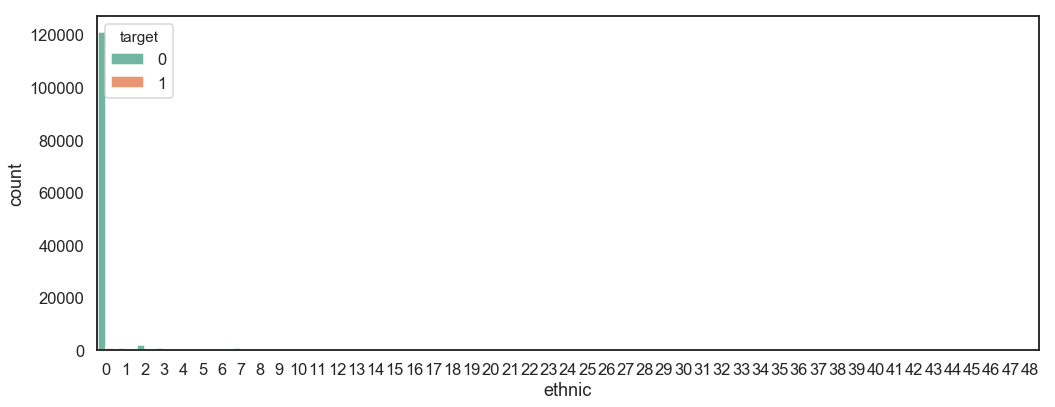

In [68]:
data = train_x.merge(train_y, on='id', how='left')
for col in ['ethnic']:
    f, ax = plt.subplots(1, 1, figsize=(15,6))
    sns.set(style="white", context="talk")
    sns.countplot(x=col, hue="target", data=data, ax=ax, palette="Set2")
    f.tight_layout()

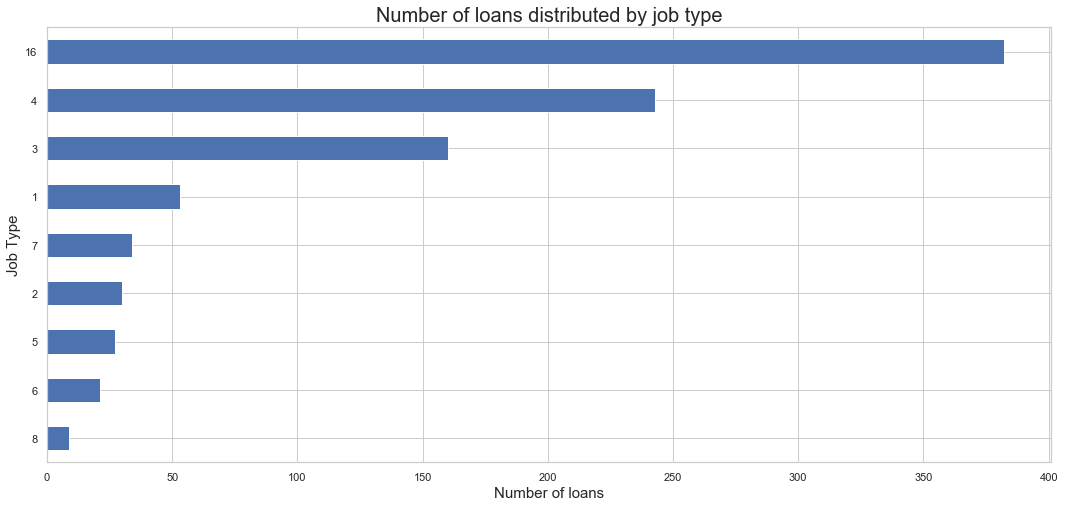

In [40]:
sns.set_style('whitegrid')
#subplot(numRows, numCols, plotNum)
plt.figure()

data[(data.target == 1)]['job'].value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(18,8))

plt.title('Number of loans distributed by job type',fontsize=20)
plt.xlabel('Number of loans',fontsize=15)
plt.ylabel('Job Type',fontsize=15);

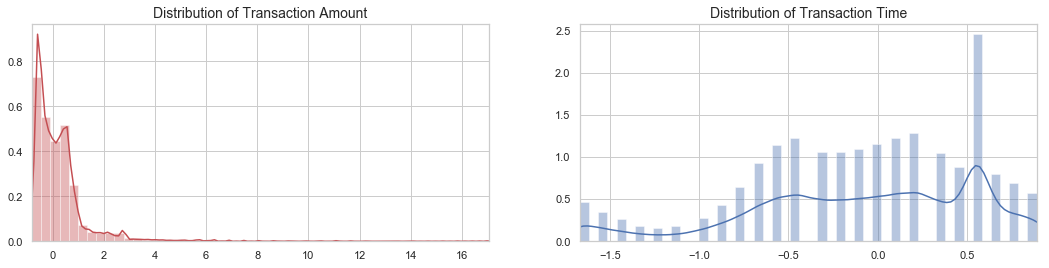

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['scaled_lmt'].values
time_val = data['scaled_setupHour'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

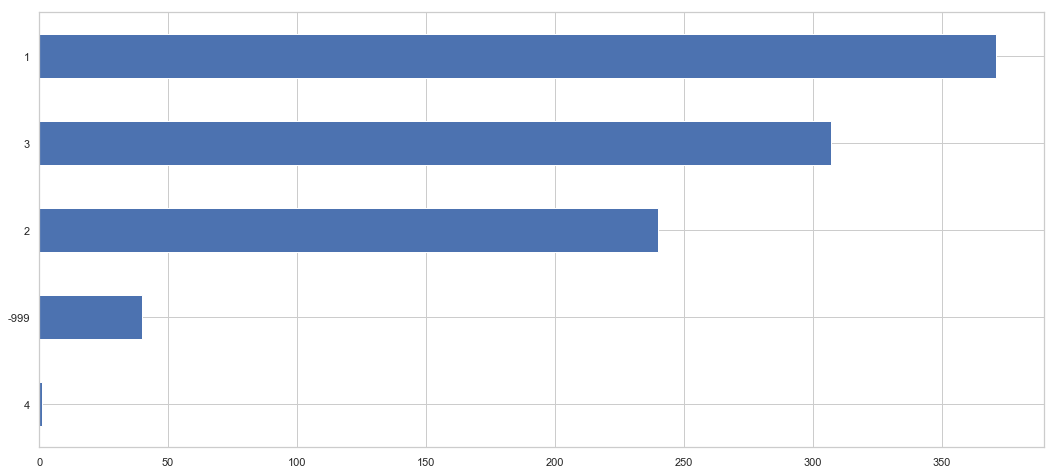

In [50]:
data[(data.target ==1)]['basicLevel'].value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(18,8))

In [43]:
print(data.columns[:20])
print(data.columns[20:40])
print(data.columns[40:60])
print(data.columns[60:80])
print(data.columns[80:])

Index(['certId', 'loanProduct', 'gender', 'age', 'dist', 'edu', 'job',
       'basicLevel', 'x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7',
       'x_8', 'x_9', 'x_10', 'x_11'],
      dtype='object')
Index(['x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20',
       'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29',
       'x_30', 'x_31'],
      dtype='object')
Index(['x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40',
       'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49',
       'x_50', 'x_51'],
      dtype='object')
Index(['x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60',
       'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69',
       'x_70', 'x_71'],
      dtype='object')
Index(['x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78', 'bankCard',
       'ethnic', 'residentAddr', 'highestEdu', 'linkRela', 'weekday',
       'ncloseCreditCard', 'unpayIn

In [22]:
data = train_x.merge(train_y, on='id', how='left')
data[(data.target == 1 )]['bankCard'].value_counts().head()

-999.0          349
 0.0            181
 621226360.0      7
 621785700.0      6
 621799610.0      5
Name: bankCard, dtype: int64

In [21]:
data[(data.target == 0 )]['bankCard'].value_counts().head()

-999.0          30404
 0.0            19971
 621226201.0      959
 623058000.0      742
 621226360.0      728
Name: bankCard, dtype: int64

In [26]:
import re
content = '621226201'
result = re.match(r'621226[0-9]*' , content)
if result:
    print (result.group())
else:
    print ('No match!')

No match!


In [25]:
data.isNew.value_counts()

0    84196
1    47833
Name: isNew, dtype: int64

##  具有业务涵义的特征预处理

In [13]:
train_x['bankCard'].isnull().sum()

0

In [40]:
#提取cardbin，转换成银行卡的产品名称，相当于完成一次简单的聚类
from utils import getbankname,getcardname,getcardtype
#train_x = encoding_bankcard(train_x)
#test_x = encoding_bankcard(test_x)

train_x['bankCard'] = train_x['bankCard'].astype(int) #去除标点符号
train_x['bankCard'] = train_x['bankCard'].astype(str) #转为字符串
train_x['bankCard'] = train_x['bankCard'].apply(lambda x: x[0:6])#获取卡BIN号
#train_x['bankname'] = train_x.bankCard.apply(lambda x: getbankname(x))#获取银行名称
train_x['cardname'] = train_x.bankCard.apply(lambda x: getcardname(x))#获取卡产品名称
train_x['cardtype'] = train_x.bankCard.apply(lambda x: getcardtype(x))#获取卡类型
train_x.drop(columns=['bankCard'], axis=1, inplace=True)

test_x['bankCard'] = test_x['bankCard'].astype(int) #去除标点符号
test_x['bankCard'] = test_x['bankCard'].astype(str) #转为字符串
test_x['bankCard'] = test_x['bankCard'].apply(lambda x: x[0:6])#获取卡BIN号
#test_x['bankname'] = test_x.bankCard.apply(lambda x: getbankname(x))#获取银行名称
test_x['cardname'] = test_x.bankCard.apply(lambda x: getcardname(x))#获取卡产品名称
test_x['cardtype'] = test_x.bankCard.apply(lambda x: getcardtype(x))#获取卡类型
test_x.drop(columns=['bankCard'], axis=1, inplace=True)

In [33]:
data = train_x.merge(train_y, on='id', how='left')
data[(data.target == 1)].cardtype.value_counts().head()

其他卡类型    533
借记卡      400
          26
Name: cardtype, dtype: int64

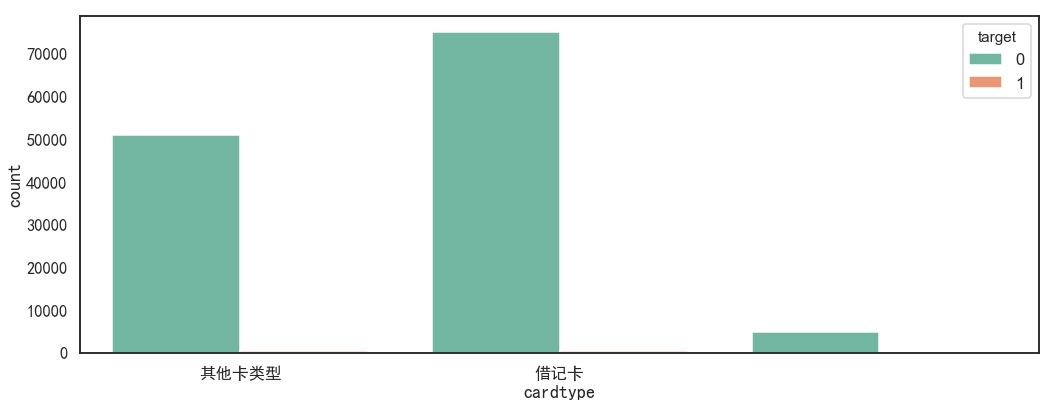

In [34]:
plt.rcParams['font.family'] = 'SimHei' 

data = train_x.merge(train_y, on='id', how='left')
for col in ['cardtype']:
    f, ax = plt.subplots(1, 1, figsize=(15,6))
    sns.set(style="white", context="talk")
    sns.countplot(x=col, hue="target", data=data, ax=ax, palette="Set2")
    f.tight_layout()

可以看出，所有数据中，放款卡号主要以借记卡为主，卡类型对于违约的区分度也不是很高。

In [19]:
#检查测试集银行名称是否为训练集中银行名称的子集
#没有输出表明是，否则为否
#for bankname in list(set(test_x.bankname.value_counts().index)):
#    if bankname not in list(set(train_x.bankname.value_counts().index)):
#        print(bankname)

In [20]:
#train_x.drop(columns=['cardtype'], axis=1, inplace=True)
#test_x.drop(columns=['cardtype'], axis=1, inplace=True)

In [28]:
print(train_x.columns.to_list())

['id', 'certId', 'loanProduct', 'gender', 'age', 'dist', 'edu', 'job', 'lmt', 'basicLevel', 'x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78', 'certValidBegin', 'certValidStop', 'ethnic', 'residentAddr', 'highestEdu', 'linkRela', 'setupHour', 'weekday', 'ncloseCreditCard', 'unpayIndvLoan', 'unpayOtherLoan', 'unpayNormalLoan', '5yearBadloan', 'isNew', 'cardname', 'cardtype']


## 变量分箱

> 采用卡方（ChiMerge）分箱，要求分箱完成之后：

> - 不超过5箱（本模型默认不超过5箱）
> - 坏样本率（Bad Rate）单调
> - 每箱同时包含好坏样本
> - 如有特殊值如-1单独成一箱，此箱不参与Bad Rate单调性检验
> - 连续型的变量可以直接进行分箱，对于类别型的变量分为以下几种情况：

- 当类别型变量取值比较多时（本例中大于5），先用bad rate 进行编码，然后放入连续型变量列表中，使用连续型变量分箱的方法进行分箱。
当取值较少时（本例中小于等于5），分两种情况：
 - （1）如果每种类别同时包含好坏样本，则无需分箱；
 - （2）如果有类别只包含好坏样本的一种，则需要合并；


- 作者：乘物以游心
- 链接：https://www.jianshu.com/p/eaf80fcaeed0
- 来源：简书
- 著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

In [43]:
train_x.x_33.value_counts()

3    43821
1    41166
2    22697
4    11492
5    11044
6     1498
0      311
Name: x_33, dtype: int64

In [44]:
print(train_x.columns.to_list())

['id', 'certId', 'loanProduct', 'gender', 'age', 'dist', 'edu', 'job', 'lmt', 'basicLevel', 'x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78', 'certValidBegin', 'certValidStop', 'ethnic', 'residentAddr', 'highestEdu', 'linkRela', 'setupHour', 'weekday', 'ncloseCreditCard', 'unpayIndvLoan', 'unpayOtherLoan', 'unpayNormalLoan', '5yearBadloan', 'isNew', 'cardname', 'cardtype']


### 特征分类（数值型/分类变量）

In [36]:
from utils import check_feature_value_counts

In [37]:
check_feature_value_counts(test_x)

单值变量：['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_13', 'x_15', 'x_17', 'x_18', 'x_19', 'x_21', 'x_23', 'x_24', 'x_32', 'x_36', 'x_37', 'x_38', 'x_39', 'x_57', 'x_58', 'x_59', 'x_60', 'x_77', 'x_78', 'isNew']

二值变量：['loanProduct', 'gender', 'x_12', 'x_14', 'x_16', 'x_20', 'x_22', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_35', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'ncloseCreditCard', 'unpayIndvLoan', 'unpayOtherLoan', 'unpayNormalLoan', '5yearBadloan', 'cardtype']

多值变量：['age', 'dist', 'edu', 'job', 'lmt', 'basicLevel', 'x_33', 'x_34', 'certValidBegin', 'certValidStop', 'ethnic', 'residentAddr', 'highestEdu', 'linkRela', 'setupHour', 'weekday', 'cardname']



In [38]:
check_feature_value_counts(train_x)

单值变量：['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_13', 'x_15', 'x_17', 'x_18', 'x_19', 'x_21', 'x_23', 'x_24', 'x_36', 'x_37', 'x_38', 'x_57', 'x_58', 'x_59', 'x_60', 'x_77', 'x_78']

二值变量：['loanProduct', 'gender', 'x_12', 'x_14', 'x_16', 'x_20', 'x_22', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_35', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'ncloseCreditCard', 'unpayIndvLoan', 'unpayOtherLoan', 'unpayNormalLoan', '5yearBadloan', 'isNew', 'cardtype']

多值变量：['age', 'dist', 'edu', 'job', 'lmt', 'basicLevel', 'x_33', 'x_34', 'certValidBegin', 'certValidStop', 'ethnic', 'residentAddr', 'highestEdu', 'linkRela', 'setupHour', 'weekday', 'cardname']



In [151]:
train_x.cardname.value_counts().head()

其他卡产品         51579
金穗通宝卡（银联卡）    17419
龙卡通           13580
牡丹卡普卡         10023
IC绿卡通          5710
Name: cardname, dtype: int64

In [152]:
train_x.unpayNormalLoan.value_counts()

 0      111605
 1       20113
-999       311
Name: unpayNormalLoan, dtype: int64

In [153]:
test_x.unpayNormalLoan.value_counts()

 0      19158
 1       4326
-999       77
Name: unpayNormalLoan, dtype: int64

In [29]:
#我们初步挑选变量如下，分为两类：数值型（连续型）的和类别型的变量
data = train_x.merge(train_y, on='id', how='left')


#训练数据集分割特征，不做处理，待特征加工完成后：
#isnew == 0：作为训练集（SMOTE）
#isnew == 1：作为验证集
split_features = ['isNew']
#二分类/自然（无大小）特征，按照One-hot编码进行处理
#bin_features = [ 'gender', '5yearBadloan']
nonm_features = [ 'gender', '5yearBadloan','loanProduct', 'basicLevel','edu',
                 'job','cardname','highestEdu','linkRela', 'ncloseCreditCard', 
                 'unpayIndvLoan','unpayOtherLoan', 'unpayNormalLoan','weekday','ethnic', 'cardname', 'cardtype']

#多值型类别特征，需要分箱
cat_features = [ 'certId','dist', 'certValidBegin', 'certValidStop',
                  'residentAddr']

#数值型特征，需要分箱
num_features = ['age', 'lmt', 'setupHour']



#特殊特征，暂不做处理
spec_features = ['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6','x_7', 'x_8', 'x_9','x_10',
                 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18','x_19', 'x_20',
                 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27','x_28', 'x_29','x_30', 
                 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38','x_39', 'x_40', 
                 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47','x_48', 'x_49','x_50',
                 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58','x_59', 'x_60', 
                 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67','x_68', 'x_69','x_70', 
                 'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78']

print("Original shape:{}\n".format(train_x.shape))

#remove :['id','isnew']
#print("remove :['id']")
print("split_features shape:{}".format(len(split_features)))
print("nonm_features shape:{}".format(len(nonm_features)))
print("num_features shape:{}".format(len(num_features)))
print("cat_features shape:{}".format(len(cat_features)))
print("spec_features shape:{}".format(len(spec_features)))
print("sum shape:{}".format(len(split_features)+len(nonm_features) +len(num_features)+len(cat_features)+ len(spec_features)))


all_f = split_features + nonm_features + num_features + cat_features +spec_features
rmv_f = []
for f in train_x.columns:
    if f not in all_f:
        rmv_f.append(f)        
print("remove feature :[{}]".format(rmv_f))

Original shape:(132029, 105)

split_features shape:1
nonm_features shape:17
num_features shape:3
cat_features shape:5
spec_features shape:79
sum shape:105
remove feature :[['id']]


In [236]:
print(train_x[all_f].head())
print(test_x[all_f].head())

   isNew  gender  5yearBadloan  loanProduct  basicLevel  edu  job    cardname  \
0      1       2             0            1           3    0    8       其他卡产品   
1      1       2             0            2           3    0    3  金穗通宝卡（银联卡）   
2      1       2             0            1           1   70    5       其他卡产品   
3      1       2             0            3           3    0    4       其他卡产品   
4      1       2             0            2           2    0    2  龙卡储蓄卡（银联卡）   

   highestEdu  linkRela  ...  x_69  x_70  x_71  x_72  x_73  x_74  x_75  x_76  \
0        -999         0  ...     0     1     0     0     0     1     0     0   
1          99        11  ...     0     1     0     0     0     1     0     0   
2          70         0  ...     0     1     0     0     0     1     0     0   
3        -999      -999  ...     0     1     0     0     0     0     0     0   
4          99        11  ...     0     1     1     0     0     1     0     0   

   x_77  x_78  
0     0     0  


### 类别型变量分类

In [237]:
more_value_features = []
less_value_features = []
# 第一步，检查类别型变量中，哪些变量取值超过5

for var in cat_features:
    valueCounts = len(set(data[var]))
    #print(var," ->",valueCounts)
    if valueCounts > 5:
        more_value_features.append(var)  #取值超过5的变量，需要bad rate编码，再用卡方分箱法进行分箱
    else:
        less_value_features.append(var)
        
print("more_value_features: {} , total_num: {}".format(more_value_features, len(more_value_features)))
print("less_value_features: {}, total_num: {}".format(less_value_features,len(less_value_features)))

more_value_features: ['certId', 'dist', 'certValidBegin', 'certValidStop', 'residentAddr'] , total_num: 5
less_value_features: [], total_num: 0


In [238]:
print(len(more_value_features))
print(len(less_value_features))

5
0


#### 特征合并（取值<5时）

In [239]:
#第二步，当取值<5时：如果每种类别同时包含好坏样本，无需分箱；如果有类别只包含好坏样本的一种，需要合并。
from utils import  BinBadRate,MergeBad0

merge_bin_dict = {}  #存放需要合并的变量，以及合并方法
var_bin_list = []   #由于某个取值没有好或者坏样本而需要合并的变量
for col in less_value_features:
    print("do {} ....".format(col))
    binBadRate = BinBadRate(data, col, 'target')[0]
    if min(binBadRate.values()) == 0 :  #由于某个取值没有坏样本而进行合并
        print ('{} need to be combined due to 0 bad rate'.format(col))
        combine_bin = MergeBad0(data, col, 'target')
        merge_bin_dict[col] = combine_bin
        newVar = col + '_Bin'
        data[newVar] = data[col].map(combine_bin)
        data.drop([col], axis=1, inplace=True)
        var_bin_list.append(newVar)
        #less_value_features.remove(col)

    if max(binBadRate.values()) == 1:    #由于某个取值没有好样本而进行合并
        print ('{} need to be combined due to 0 good rate'.format(col))
        combine_bin = MergeBad0(data, col, 'target',direction = 'good')
        merge_bin_dict[col] = combine_bin
        newVar = col + '_Bin'
        data[newVar] = data[col].map(combine_bin)
        data.drop([col], axis=1, inplace=True)
        var_bin_list.append(newVar)
        #less_value_features.remove(col)


#less_value_features里剩下不需要合并的变量
less_value_features = [i for i in less_value_features if i + '_Bin' not in var_bin_list]


#保存merge_bin_dict
file1 = open(path+'merge_bin_dict.pkl','wb+')
pickle.dump(merge_bin_dict,file1)
file1.close()

In [240]:
print(len(less_value_features))
print(len(var_bin_list))
print(len(merge_bin_dict))

0
0
0


In [241]:
print(var_bin_list)

[]


#### 特征类别调整（取值>5时）

In [242]:
#（ii） 第三步，当取值>5时：用bad rate进行编码，放入连续型变量里。
br_encoding_dict = {}   #记录按照bad rate进行编码的变量，及编码方式
from utils import BadRateEncoding
for col in more_value_features:
    #print("do {} ....".format(col))
    br_encoding = BadRateEncoding(data, col, 'target')
    data[col+'_br_encoding'] = br_encoding['encoding']
    data.drop([col], axis=1, inplace=True)
    
    br_encoding_dict[col] = br_encoding['bad_rate']
    num_features.append(col+'_br_encoding')
    
file2 = open(path+'br_encoding_dict.pkl','wb+')
pickle.dump(br_encoding_dict,file2)
file2.close()

In [243]:
print("less_value_features:",len(less_value_features))
print("var_bin_list:",len(var_bin_list))
print("merge_bin_dict:",len(merge_bin_dict))
print("more_value_features:",len(more_value_features))
print("br_encoding_dict:",len(br_encoding_dict))

less_value_features: 0
var_bin_list: 0
merge_bin_dict: 0
more_value_features: 5
br_encoding_dict: 5


In [244]:
print(num_features)

['age', 'lmt', 'setupHour', 'certId_br_encoding', 'dist_br_encoding', 'certValidBegin_br_encoding', 'certValidStop_br_encoding', 'residentAddr_br_encoding']


In [245]:
print(data.columns.tolist())

['id', 'loanProduct', 'gender', 'age', 'edu', 'job', 'lmt', 'basicLevel', 'x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78', 'ethnic', 'highestEdu', 'linkRela', 'setupHour', 'weekday', 'ncloseCreditCard', 'unpayIndvLoan', 'unpayOtherLoan', 'unpayNormalLoan', '5yearBadloan', 'isNew', 'cardname', 'cardtype', 'target', 'certId_br_encoding', 'dist_br_encoding', 'certValidBegin_br_encoding', 'certValidStop_br_encoding', 'residentA

###  连续变量特征分箱

In [246]:
#第四步，分箱，对连续型变量列表num_features进行卡方分箱。本文分箱后的最多的箱数为5箱。
from  utils import Chi2,ChiMerge,BadRateMonotone,AssignBin,SplitData,AssignGroup

# （iii）对连续型变量进行分箱，包括（ii）中的变量
continous_merged_dict = {}
for col in num_features:
    print("{} is in processing".format(col))
    #if -1 not in set(data[col]):   #－1会当成特殊值处理。如果没有－1，则所有取值都参与分箱
    if -999 not in set(data[col]):   #-999会当成特殊值处理。如果没有－999，则所有取值都参与分箱
        max_interval = 5   #分箱后的最多的箱数
        cutOff = ChiMerge(data, col, 'target', max_interval=max_interval,special_attribute=[],minBinPcnt=0)
        data[col+'_Bin'] = data[col].map(lambda x: AssignBin(x, cutOff,special_attribute=[]))
        
        monotone = BadRateMonotone(data, col+'_Bin', 'target')   # 检验分箱后的单调性是否满足
        while(not monotone):
            # 检验分箱后的单调性是否满足。如果不满足，则缩减分箱的个数。
            max_interval -= 1
            cutOff = ChiMerge(data, col, 'target', max_interval=max_interval, special_attribute=[],
                              minBinPcnt=0)
            data[col + '_Bin'] = data[col].map(lambda x: AssignBin(x, cutOff, special_attribute=[]))
           
            if max_interval == 2:
                # 当分箱数为2时，必然单调
                break
            monotone = BadRateMonotone(data, col + '_Bin', 'target')
        newVar = col + '_Bin'
        data[newVar] = data[col].map(lambda x: AssignBin(x, cutOff, special_attribute=[]))
        var_bin_list.append(newVar)
    else:
        max_interval = 5
        # 如果有－999，则除去－999后，其他取值参与分箱
        cutOff = ChiMerge(data, col, 'target', max_interval=max_interval, special_attribute=[-1,-999],
                          minBinPcnt=0)
        data[col + '_Bin'] = data[col].map(lambda x: AssignBin(x, cutOff, special_attribute=[-1,-999]))
        monotone = BadRateMonotone(data, col + '_Bin', 'target',['Bin -1'])
        while (not monotone):
            max_interval -= 1
            # 如果有－1，－1的bad rate不参与单调性检验
            cutOff = ChiMerge(data, col, 'target', max_interval=max_interval, special_attribute=[-1,-999],
                              minBinPcnt=0)
            data[col + '_Bin'] = data[col].map(lambda x: AssignBin(x, cutOff, special_attribute=[-1,-999]))
            
            if max_interval == 3:
                # 当分箱数为3-1=2时，必然单调
                break
            monotone = BadRateMonotone(data, col + '_Bin', 'target',['Bin -1'])
        newVar = col + '_Bin'
        data[newVar] = data[col].map(lambda x: AssignBin(x, cutOff, special_attribute=[-1,-999]))
        var_bin_list.append(newVar)
        
    continous_merged_dict[col] = cutOff
    #data.drop([col], axis=1, inplace=True)
    
file3 = open(path+'continous_merged_dict.pkl','wb+')
pickle.dump(continous_merged_dict,file3)
file3.close()

age is in processing
lmt is in processing
setupHour is in processing
certId_br_encoding is in processing
dist_br_encoding is in processing
certValidBegin_br_encoding is in processing
certValidStop_br_encoding is in processing
residentAddr_br_encoding is in processing


In [248]:
print("less_value_features:",len(less_value_features))
print("var_bin_list:",len(var_bin_list))
print("merge_bin_dict:",len(merge_bin_dict))
print("more_value_features:",len(more_value_features))
print("br_encoding_dict:",len(br_encoding_dict))
print("continous_merged_dict:",len(continous_merged_dict))

less_value_features: 0
var_bin_list: 8
merge_bin_dict: 0
more_value_features: 5
br_encoding_dict: 5
continous_merged_dict: 8


In [249]:
print(continous_merged_dict)

{'age': [36], 'lmt': [0.733, 1.0, 1.496, 6.367000000000001], 'setupHour': [6, 19], 'certId_br_encoding': [0.034482758620689655, 0.046153846153846156, 0.0625], 'dist_br_encoding': [0.025, 0.038461538461538464, 0.05263157894736842], 'certValidBegin_br_encoding': [0.03076923076923077, 0.045454545454545456, 0.05714285714285714], 'certValidStop_br_encoding': [0.030303030303030304, 0.04878048780487805, 0.07317073170731707], 'residentAddr_br_encoding': [0.03571428571428571, 0.058823529411764705, 0.08333333333333333]}


In [251]:
print(var_bin_list)

['age_Bin', 'lmt_Bin', 'setupHour_Bin', 'certId_br_encoding_Bin', 'dist_br_encoding_Bin', 'certValidBegin_br_encoding_Bin', 'certValidStop_br_encoding_Bin', 'residentAddr_br_encoding_Bin']


In [252]:
print(len(continous_merged_dict))
print(len (var_bin_list))
print(len(data.columns.tolist()))

8
8
114


### WOE编码和IV值

- **WOE编码和IV值**

 - WOE(weight of Evidence)字面意思证据权重，对分箱后的每组进行。假设good为好客户（未违约），bad为坏客户（违约）。
 - WOEi=ln(pgoodpbad)=ln(good占比bad占比)=ln(#goodi#goodT#badi#badT)
 - 其中：#good(i)表示每组中标签为good的数量，#good(T)为good的总数量；bad相同。
 
 
 - **IV(information value)** 衡量的是某一个变量的信息量，公式如下：
 - IV=∑i=1N(good占比−bad占比)∗WOEi
 - 其中：N为分组的组数；IV可用来表示一个变量的预测能力。


> 经常上一步的分箱后，分箱后的变量有如下几种情况：
> - 初始取值个数小于5，且不需要合并的类别型变量。
> - 初始取值个数小于5，需要合并的类别型变量，并且合并后的新变量不再需要合并。
> - 初始取值个数超过5，需要合并的类别型变量，并且合并后的新变量不再需要合并。
> - 连续型变量进行卡方分箱。

> How to interpret value of IV?
>   - IV -小于 0.02              useless for prediction
>   - IV 0.02 to 0.1             Weak predictor 
>   - IV 0.1 to 0.3              Medium predictor  
>   - IV 0.3 to 0.5              Strong predictor
>   - IV 大于 0.5                Suspicious or too good to be true


根据IV值来调整分箱结构并重新计算WOE和IV，直到IV达到最大值，此时的分箱效果最好。

> 分组一般原则
> - 组间差异大
> - 组内差异小
> - 每组占比不低于5%
> - 必须有好、坏两种分类

In [253]:
print(var_bin_list)
print(less_value_features)

['age_Bin', 'lmt_Bin', 'setupHour_Bin', 'certId_br_encoding_Bin', 'dist_br_encoding_Bin', 'certValidBegin_br_encoding_Bin', 'certValidStop_br_encoding_Bin', 'residentAddr_br_encoding_Bin']
[]


<BarContainer object of 8 artists>

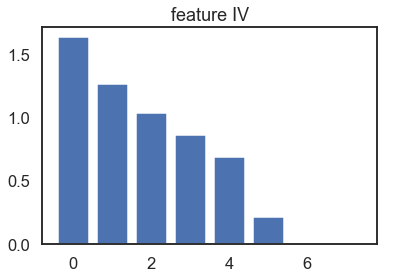

In [254]:
#如下取到每个变量分箱后的WOE和该变量的IV值：
#第四步：WOE编码、计算IV
from utils import CalcWOE
WOE_dict = {}
IV_dict = {}
# 分箱后的变量进行编码，包括：
# 1，初始取值个数小于5，且不需要合并的类别型变量。存放在less_value_features中
# 2，初始取值个数小于5，需要合并的类别型变量。合并后新的变量存放在var_bin_list中
# 3，初始取值个数超过5，需要合并的类别型变量。合并后新的变量存放在var_bin_list中
# 4，连续变量。分箱后新的变量存放在var_bin_list中
all_var = var_bin_list  + less_value_features
for var in all_var:
    #print("do ",var)
    woe_iv = CalcWOE(data, var, 'target')
    WOE_dict[var] = woe_iv['WOE']
    IV_dict[var] = woe_iv['IV']
    #print("finish {}".format(var))
    
file4 = open(path+'WOE_dict.pkl','wb+')
pickle.dump(WOE_dict,file4)
file4.close()

#将变量IV值进行降序排列，方便后续挑选变量
IV_dict_sorted = sorted(IV_dict.items(), key=lambda x: x[1], reverse=True)
IV_values = [i[1] for i in IV_dict_sorted]
IV_name = [i[0] for i in IV_dict_sorted]
plt.title('feature IV')
plt.bar(range(len(IV_values)),IV_values)

### 单变量分析和多变量分析

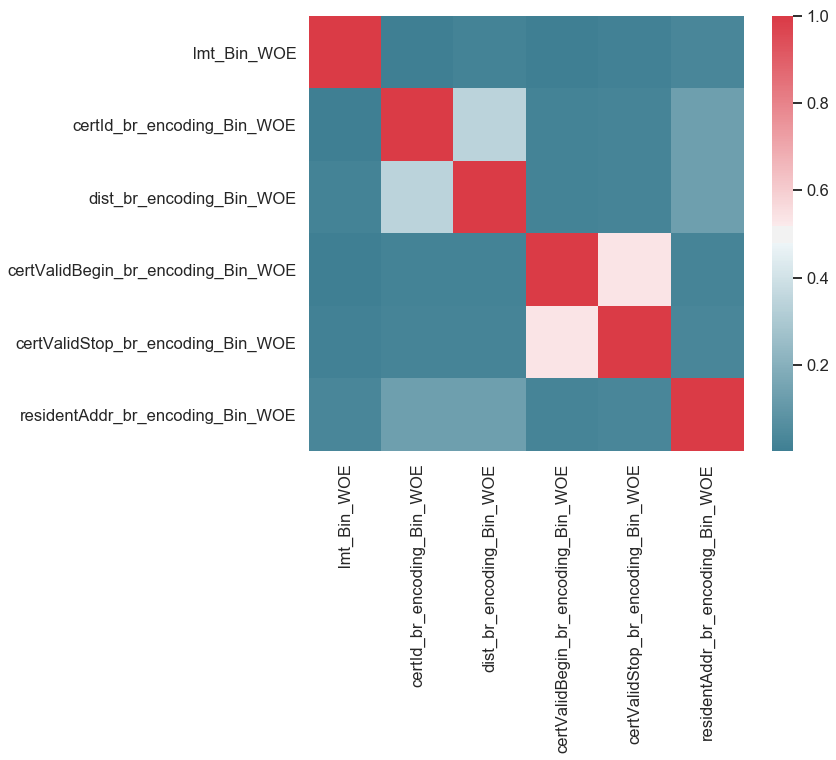

In [255]:
#第五步：单变量分析和多变量分析，均基于WOE编码后的值。
#（1）选择IV高于0.01的变量
#（2）比较两两线性相关性。如果相关系数的绝对值高于阈值，剔除IV较低的一个
#选取IV>0.01的变量

high_IV = {k:v for k, v in IV_dict.items() if v >= 0.02}
high_IV_sorted = sorted(high_IV.items(),key=lambda x:x[1],reverse=True)
 
short_list = high_IV.keys()
short_list_2 = []
for var in short_list:
    newVar = var + '_WOE'
    data[newVar] = data[var].map(WOE_dict[var])
    data.drop(var,axis=1,inplace=True)
    short_list_2.append(newVar)

#对于上一步的结果，计算相关系数矩阵，并画出热力图进行数据可视化
data = data[short_list_2]
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)

In [256]:
print(data.columns.tolist())

['lmt_Bin_WOE', 'certId_br_encoding_Bin_WOE', 'dist_br_encoding_Bin_WOE', 'certValidBegin_br_encoding_Bin_WOE', 'certValidStop_br_encoding_Bin_WOE', 'residentAddr_br_encoding_Bin_WOE']


In [257]:
data.head()

,lmt_Bin_WOE,certId_br_encoding_Bin_WOE,dist_br_encoding_Bin_WOE,certValidBegin_br_encoding_Bin_WOE,certValidStop_br_encoding_Bin_WOE,residentAddr_br_encoding_Bin_WOE
0,-0.203419,0.206863,0.166134,0.312695,0.592999,0.329235
1,0.140440,0.206863,0.166134,-2.052494,0.592999,0.329235
2,-1.664694,0.206863,0.166134,0.312695,0.592999,0.329235
3,-0.203419,0.206863,0.166134,0.312695,0.592999,0.329235
4,0.140440,0.206863,-2.819518,-2.052494,-2.641612,0.329235


In [258]:
##两两间的线性相关性检验
##1，将候选变量按照IV进行降序排列
##2，计算第i和第i+1的变量的线性相关系数
##3，对于系数超过阈值的两个变量，剔除IV较低的一个
deleted_index = []
cnt_vars = len(high_IV_sorted)
for i in range(cnt_vars):
    if i in deleted_index:
        continue
    x1 = high_IV_sorted[i][0]+"_WOE"
    for j in range(cnt_vars):
        if i == j or j in deleted_index:
            continue
        y1 = high_IV_sorted[j][0]+"_WOE"
        roh = np.corrcoef(data[x1],data[y1])[0,1]
        if abs(roh)>0.7:
            x1_IV = high_IV_sorted[i][1]
            y1_IV = high_IV_sorted[j][1]
            if x1_IV > y1_IV:
                deleted_index.append(j)
            else:
                deleted_index.append(i)

multi_analysis_vars_1 = [high_IV_sorted[i][0]+"_WOE" for i in range(cnt_vars) if i not in deleted_index]

In [176]:
multi_analysis_vars_1

['certValidStop_br_encoding_Bin_WOE',
 'residentAddr_br_encoding_Bin_WOE',
 'certValidBegin_br_encoding_Bin_WOE',
 'certId_br_encoding_Bin_WOE',
 'dist_br_encoding_Bin_WOE',
 'lmt_Bin_WOE',
 'ethnic_br_encoding_Bin_WOE']

In [177]:
#data.replace(np.inf,0, inplace=True)
data[multi_analysis_vars_1]

,certValidStop_br_encoding_Bin_WOE,residentAddr_br_encoding_Bin_WOE,certValidBegin_br_encoding_Bin_WOE,certId_br_encoding_Bin_WOE,dist_br_encoding_Bin_WOE,lmt_Bin_WOE,ethnic_br_encoding_Bin_WOE
0,0.592999,0.329235,0.312695,0.206863,0.166134,-0.203419,-0.076809
1,0.592999,0.329235,-2.052494,0.206863,0.166134,0.140440,-0.076809
2,0.592999,0.329235,0.312695,0.206863,0.166134,-1.664694,-0.076809
3,0.592999,0.329235,0.312695,0.206863,0.166134,-0.203419,-0.076809
4,-2.641612,0.329235,-2.052494,0.206863,-2.819518,0.140440,-0.076809
5,0.592999,0.329235,0.312695,0.206863,0.166134,-0.203419,-0.076809
6,0.592999,0.329235,0.312695,0.206863,0.166134,0.140440,-0.076809
7,0.592999,0.329235,0.312695,0.206863,0.166134,-0.991478,-0.076809
8,0.592999,0.329235,-2.052494,0.206863,0.166134,-1.593628,-0.076809
9,-2.002822,0.329235,0.312695,0.206863,0.166134,0.140440,-0.076809


In [259]:
##多变量分析：VIF
from utils import variance_inflation_factor

X = np.matrix(data[multi_analysis_vars_1])
VIF_list = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
max_VIF = max(VIF_list)
print(max_VIF)
# 最大的VIF是1.32267733123(小于10)，因此这一步认为没有多重共线性
multi_analysis = multi_analysis_vars_1

1.5378155212605673


In [260]:
print(data.columns.tolist())

['lmt_Bin_WOE', 'certId_br_encoding_Bin_WOE', 'dist_br_encoding_Bin_WOE', 'certValidBegin_br_encoding_Bin_WOE', 'certValidStop_br_encoding_Bin_WOE', 'residentAddr_br_encoding_Bin_WOE']


In [261]:
data.lmt_Bin_WOE.value_counts()

-0.203419    63410
 0.140440    47497
-0.991478    11785
-1.593628     4790
-1.664694     4547
Name: lmt_Bin_WOE, dtype: int64

In [262]:
data.head()

,lmt_Bin_WOE,certId_br_encoding_Bin_WOE,dist_br_encoding_Bin_WOE,certValidBegin_br_encoding_Bin_WOE,certValidStop_br_encoding_Bin_WOE,residentAddr_br_encoding_Bin_WOE
0,-0.203419,0.206863,0.166134,0.312695,0.592999,0.329235
1,0.140440,0.206863,0.166134,-2.052494,0.592999,0.329235
2,-1.664694,0.206863,0.166134,0.312695,0.592999,0.329235
3,-0.203419,0.206863,0.166134,0.312695,0.592999,0.329235
4,0.140440,0.206863,-2.819518,-2.052494,-2.641612,0.329235


### 特征分箱完成

In [263]:
#bin_features + spec_features
#train_x[bin_features + spec_features]
all_columns = nonm_features + spec_features + split_features + data.columns.tolist() 
X = pd.concat([train_x[nonm_features + spec_features + split_features], data], axis=1)
y = train_y['target']
X.head()

,gender,5yearBadloan,loanProduct,basicLevel,edu,job,cardname,highestEdu,linkRela,ncloseCreditCard,...,x_76,x_77,x_78,isNew,lmt_Bin_WOE,certId_br_encoding_Bin_WOE,dist_br_encoding_Bin_WOE,certValidBegin_br_encoding_Bin_WOE,certValidStop_br_encoding_Bin_WOE,residentAddr_br_encoding_Bin_WOE
0,2,0,1,3,0,8,其他卡产品,-999,0,1,...,0,0,0,1,-0.203419,0.206863,0.166134,0.312695,0.592999,0.329235
1,2,0,2,3,0,3,金穗通宝卡（银联卡）,99,11,1,...,0,0,0,1,0.140440,0.206863,0.166134,-2.052494,0.592999,0.329235
2,2,0,1,1,70,5,其他卡产品,70,0,0,...,0,0,0,1,-1.664694,0.206863,0.166134,0.312695,0.592999,0.329235
3,2,0,3,3,0,4,其他卡产品,-999,-999,1,...,0,0,0,1,-0.203419,0.206863,0.166134,0.312695,0.592999,0.329235
4,2,0,2,2,0,2,龙卡储蓄卡（银联卡）,99,11,1,...,0,0,0,1,0.140440,0.206863,-2.819518,-2.052494,-2.641612,0.329235


In [264]:
print(X.shape,y.shape)

(132029, 101) (132029,)


In [265]:
print(X.columns.tolist())

['gender', '5yearBadloan', 'loanProduct', 'basicLevel', 'edu', 'job', 'cardname', 'highestEdu', 'linkRela', 'ncloseCreditCard', 'unpayIndvLoan', 'unpayOtherLoan', 'unpayNormalLoan', 'weekday', 'ethnic', 'x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78', 'isNew', 'lmt_Bin_WOE', 'certId_br_encoding_Bin_WOE', 'dist_br_encoding_Bin_WOE', 'certValidBegin_br_encoding_Bin_WOE', 'certValidStop_br_encoding_Bin_WOE', 'residentAddr_br_e

## OneHotEncoder for categary feature

- 分类器往往默认数据数据是连续的，并且是有序的。
- 一种可能的解决方法是采用独热编码（One-Hot Encoding）。热编码即 One-Hot 编码，又称一位有效编码，其方法是使用N位状态寄存器来对N个状态进行编码，每个状态都由他独立的寄存器位，并且在任意时候，其中只有一位有效。
- 据经验，one-hot用在GBDT、XGBoost这些模型里面都挺好的，但是用在逻辑回归里不行。因为逻辑回归要求变量间相互独立，如果你只有一个属性需要做one-hot编码还好，如果你有多个属性需要做one-ont编码，那么当某个样本的多个one-hot属性同时为1时，这两个属性就完全相关了，必然会导致singular error，也就是非奇异矩阵不能求解唯一解，得不出唯一的模型，但是你又不可能把同一个属性的某一个one-hot延伸变量删除。
- 如果在逻辑回归中入模标称属性，可以直接替换成数值，然后做woe变换，用每个类别的woe值来代替原来的数值，这样既能够避免生成相关性强的变量，又能避开类别间大小无法比较的问题。

> 原文链接：https://blog.csdn.net/weixin_39750084/article/details/81432619


**Is OneHotEncoder really needed for XGBoost?**

**geher:**

This is a difficult question to answer, and has been discussed here before. 
**XGBoost and other tree models** typically don't require one hot encoding like linear models do. This is because the ordering of labels when using label encoding matters less for trees. One hot encoding for tree based algorithms may also perform poorly due to reasons discussed in the book Elements of Machine Learning (Hastie/Tibshirani/Friedman):

"The partitioning algorithm favor categorical predictors with many levels q; the number of partitions grows exponentially in q, and the more choices we have, the more likely we can ﬁnd a good one for the data at hand. This can lead to severe overﬁtting if q is large, and such variables should be avoided."

> some further reading: https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931

**miguel perez:**

the topic is quite documented, short answer to your question would be no, **it is not needed**. Maybe you will find interesting this recent thead that deepens more on the subject of encoding in tree based models
> https://www.kaggle.com/c/zillow-prize-1/discussion/38793#218281

In [41]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#def Onehot_enconding(df,col):
#    new_col_pref = col
#    newcol = pd.get_dummies(df[col],prefix=new_col_pref)
#    df = pd.concat([df,newcol], axis=1)
#    df.drop(columns=[col], axis=1, inplace=True)
#    return df

def Onehot_enconding(df,col):
    new_col_pref = col
    old_cols = df.columns.to_list()
    newcol = pd.get_dummies(df[col],prefix=new_col_pref)
    df = pd.concat([df,newcol], axis=1)
    new_cols = df.columns.to_list()
    df.drop(columns=[col], axis=1, inplace=True)
    
    one_hot_col = list ( set(new_cols) - set(old_cols) )
    return df,one_hot_col

In [42]:
for col in nonm_features:
    X,one_hot_col = Onehot_enconding(X, col)

NameError: name 'X' is not defined

In [268]:
X.shape

(132029, 313)

In [188]:
X.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,ncloseCreditCard_1,unpayIndvLoan_-999,unpayIndvLoan_0,unpayIndvLoan_1,unpayOtherLoan_-999,unpayOtherLoan_0,unpayOtherLoan_1,unpayNormalLoan_-999,unpayNormalLoan_0,unpayNormalLoan_1
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0


In [82]:
print(X.columns.to_list())

['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78', 'isNew', 'lmt_Bin_WOE', 'certId_br_encoding_Bin_WOE', 'dist_br_encoding_Bin_WOE', 'certValidBegin_br_encoding_Bin_WOE', 'certValidStop_br_encoding_Bin_WOE', 'ethnic_br_encoding_Bin_WOE', 'residentAddr_br_encoding_Bin_WOE', 'gender_1', 'gender_2', '5yearBadloan_0', '5yearBadloan_1', 'loanProduct_1', 'loanProduct_2', 'loanProduct_3', 'basicLevel_-999', 'basicLevel_1', 'basicLe

## Splitting the Data 

In [269]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

#sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
sss = StratifiedShuffleSplit(n_splits=5, random_state=None)

### 数据切分方式一：按照 isNew 字段进行切分

In [270]:
##数据切分方式一：按照 isNew 字段进行切分
train_index = X[(X.isNew == 0)].index
test_index  = X[(X.isNew == 1)].index

original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

X.drop(columns=['isNew'], axis=1, inplace=True)
original_Xtrain.drop(columns=['isNew'], axis=1, inplace=True)
original_Xtest.drop(columns=['isNew'], axis=1, inplace=True)

# Check the Distribution of the labels
# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99377643 0.00622357]
[0.99090586 0.00909414]


### 数据切分方式二：随机切分

In [81]:
##数据切分方式二：随机切分
#features=data.columns.tolist()
#features.remove('target')

#X = data[features]
#y = data['target']


#X = train_x
#y = train_y['target']
for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    
    
# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels
# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Train: [ 10483  69921  22937 ...  48886   2153 123145] Test: [ 12177   7584  46917 ...   4707 127416  69549]
Train: [47826 29241 92992 ... 27498 45008 28086] Test: [86312 76580 99366 ... 64597 78363 36549]
Train: [61926 53477 27528 ... 49018 44394 35332] Test: [ 46126  70747 120337 ...  71503  32263 131895]
Train: [ 89738 100741    815 ...  56595  78658 121002] Test: [124642 110507  48058 ...  47489 102050  67108]
Train: [ 74504  97324  71513 ...  50556 108222  94091] Test: [ 32669  45434 119455 ...  28664  29168  37823]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99273728 0.00726272]
[0.99272893 0.00727107]


In [7]:
train_x.shape

(132029, 100)

In [8]:
original_Xtrain.shape[0] + original_Xtest.shape[0]

132029

In [79]:
X.head()

,x_31_WOE,x_32_WOE,x_39_WOE,x_42_WOE,residentAddr_br_encoding_Bin_WOE,certId_br_encoding_Bin_WOE,bankCard_br_encoding_Bin_WOE,dist_br_encoding_Bin_WOE,lmt_Bin_WOE,x_45_WOE,...,x_29_WOE,x_47_WOE,x_27_WOE,x_49_WOE,x_76_WOE,highestEdu_br_encoding_Bin_WOE,x_53_WOE,x_34_br_encoding_Bin_WOE,x_65_WOE,x_43_WOE
0,0.007914,0.009199,0.009237,0.00884,0.484092,0.342584,0.318928,0.297508,-0.018245,0.204776,...,-0.006651,-0.03432,-0.024994,-0.014799,0.037915,-0.041690,-0.030708,0.167485,-0.060854,-0.018581
1,0.007914,0.009199,0.009237,0.00884,0.484092,0.342584,-0.941905,0.297508,0.523491,0.204776,...,-0.006651,-0.03432,-0.024994,0.491496,0.037915,0.379700,-0.030708,0.167485,0.095412,-0.018581
2,0.007914,0.009199,0.009237,0.00884,0.484092,0.342584,0.318928,0.297508,-0.856257,-0.791066,...,-0.006651,-0.03432,-0.024994,-0.014799,0.037915,-0.727941,-0.030708,-0.069533,-0.060854,-0.018581
3,0.000000,0.009199,0.009237,0.00884,0.484092,0.342584,0.318928,0.297508,-0.018245,0.204776,...,-0.006651,-0.03432,0.370820,-0.014799,0.037915,-0.041690,0.250498,-0.069533,-0.060854,-0.018581
4,0.007914,0.009199,0.009237,0.00884,0.484092,0.342584,0.318928,-1.854680,0.523491,0.204776,...,-0.006651,-0.03432,0.370820,-0.014799,0.037915,0.379700,-0.030708,-0.014216,-0.060854,-0.018581


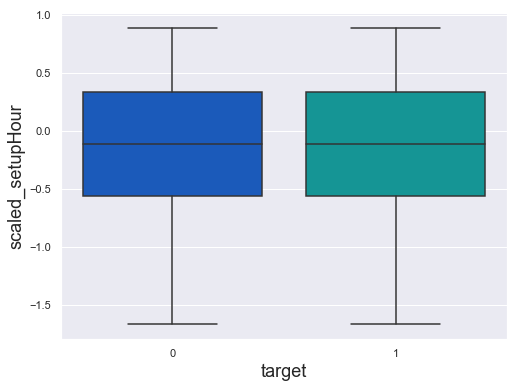

In [35]:
# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)

plt.figure(figsize=(8, 6))
plt.xlabel("target",fontsize=18)
plt.ylabel("scaled_setupHour",fontsize=18)
#plt.yscale('log')

sns.boxplot(x='target',y='scaled_setupHour',data=new_df,palette='winter')

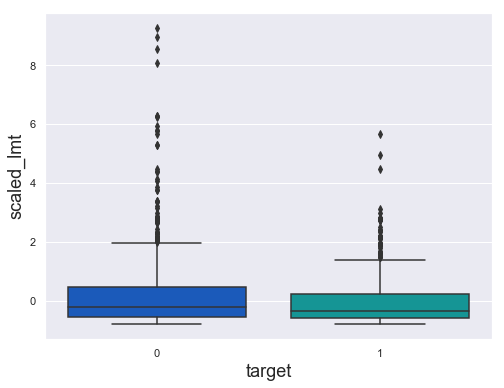

In [42]:
plt.figure(figsize=(8, 6))
plt.xlabel("target",fontsize=18)
plt.ylabel("scaled_lmt",fontsize=18)
#plt.yscale('log') 

sns.boxplot(x='target',y='scaled_lmt',data=new_df,palette='winter')

## Anomaly Detection

In [ ]:
##TODO：

## Dimesionality  reduction

In [ ]:
##TODO：

## Train Model

In [15]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve, roc_auc_score

In [38]:
import gc 
gc.collect()

20

### train by randomforest with SMOTE during cross-validation

In [82]:
from imblearn.pipeline import make_pipeline

from imblearn.over_sampling import SMOTE,SMOTENC
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV

from sklearn.ensemble import RandomForestClassifier


# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# 实例化随机森林分类函数类
forest_clf=RandomForestClassifier(random_state=42)

# 建立需要搜索的参数的范围
param_grid =[{'n_estimators':[10,30,50,100],
             'max_depth':[50,100]}]

#rand_forest_clf = RandomizedSearchCV(forest_clf, param_grid, n_iter=4)
grid_forest_clf = GridSearchCV(forest_clf, param_grid,cv=5,n_jobs=-1,verbose=3)

# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters

##init best model
best_est = forest_clf

for train, test in sss.split(original_Xtrain, original_ytrain):
    print("Train-:", train, "Test:-", test)
    ## SMOTE happens during Cross Validation not before..
    print("make pipeline .....")
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), grid_forest_clf) 
    print("fit model ......")
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    print("fit model finish!")
    best_est = grid_forest_clf.best_estimator_
    print("predict.....")
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    print("cur AUC:{}".format(roc_auc_score(original_ytrain[test], prediction)))
    print("***" * 45)
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print("AUC:{}".format(np.mean(auc_lst)))
print('---' * 30)

Train-: [ 57828  64017  22236 ... 102671  37542  36849] Test:- [ 53117 105429 117245 ... 105322  49105  48614]
make pipeline .....
fit model ......
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  6.9min finished


fit model finish!
predict.....
cur AUC:0.5406129071048807
***************************************************************************************************************************************
Train-: [30454 77653 61914 ... 58973 19630 47750] Test:- [ 33775  22308  61346 ...    467  67649 109188]
make pipeline .....
fit model ......
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  6.7min finished


fit model finish!
predict.....
cur AUC:0.5290273837849986
***************************************************************************************************************************************
Train-: [ 39002  21945  69114 ...  71136 106413   2611] Test:- [ 58787  20012 104791 ...  86481  67817 107429]
make pipeline .....
fit model ......
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  3.1min


KeyboardInterrupt: 

In [84]:
import gc
gc.collect()

2855

### BalancedRandomForestClassifier  
平衡的随机森林会随机对每个Boostrap样本进行欠采样以使其平衡。

[R2d8f3e873ec3-1]	Chen，Chao，Andy Liaw和Leo Breiman。“使用随机森林来学习不平衡的数据。”加州大学伯克利分校110（2004）：1-12。

https://imbalanced-learn.org/en/stable/generated/imblearn.ensemble.BalancedRandomForestClassifier.html

#### 使用BalancedRandomForestClassifier训练模型

In [271]:
from imblearn.ensemble import BalancedRandomForestClassifier
bclf = BalancedRandomForestClassifier(max_depth=100, random_state=42,criterion='gini',sampling_strategy='majority',n_jobs=-1,oob_score=True)
bclf.fit(original_Xtrain, original_ytrain)
#print(clf.feature_importances_) 
prediction = bclf.predict(original_Xtest)

print("AUC:{}".format(roc_auc_score(original_ytest, prediction)))
print(bclf.get_params)

AUC:0.8204494054504459
<bound method BaseEstimator.get_params of BalancedRandomForestClassifier(bootstrap=True, class_weight=None,
                               criterion='gini', max_depth=100,
                               max_features='auto', max_leaf_nodes=None,
                               min_impurity_decrease=0.0, min_samples_leaf=2,
                               min_samples_split=2,
                               min_weight_fraction_leaf=0.0, n_estimators=100,
                               n_jobs=-1, oob_score=True, random_state=42,
                               replacement=False, sampling_strategy='majority',
                               verbose=0, warm_start=False)>


In [272]:
## cross validation

# Classifier with optimal parameters
# 实例化随机森林分类函数类
forest_clf=BalancedRandomForestClassifier(random_state=42,criterion='gini',sampling_strategy='majority',n_jobs=-1,oob_score=True)

# 建立需要搜索的参数的范围
param_grid =[{'n_estimators':[30,50,100],
             'max_depth':[10,50,100]}]

grid_forest_clf = GridSearchCV(forest_clf, param_grid,cv=5,n_jobs=-1,verbose=3)

# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
best_est_list = []
auc_lst = []
for train, test in sss.split(original_Xtrain, original_ytrain):
    print("Train-:", train, "Test:-", test)
    ## SMOTE happens during Cross Validation not before..
    print("fit model ......")
    grid_forest_clf.fit(original_Xtrain[train], original_ytrain[train])
    print("fit model finish!")
    best_est = grid_forest_clf.best_estimator_
    best_est_list.append(best_est)
    print("predict.....")
    prediction = best_est.predict(original_Xtrain[test])
    
    auc = roc_auc_score(original_ytrain[test], prediction)
    auc_lst.append(auc)
    print("[IN LOOP]----> AUC:{}".format(auc))
    print("***" * 30)
    
print('---' * 30)
print("TRAIN AVG_AUC:{}".format(np.mean(auc_lst)))
y_pred = best_est.predict(original_Xtest)
print("TEST AUC:{}".format(roc_auc_score(original_ytest, y_pred)))
print('---' * 30)

Train-: [28752 48666 21193 ... 73291   194 69093] Test:- [62905 51651 30391 ... 42542 27313 60695]
fit model ......
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.3min finished


fit model finish!
predict.....
[IN LOOP]----> AUC:0.8416403147521694
******************************************************************************************
Train-: [75229 62373 22623 ... 70087 50063 10670] Test:- [80386 44633 61210 ... 34279 61767  5943]
fit model ......
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.2min finished


fit model finish!
predict.....
[IN LOOP]----> AUC:0.8208008530666274
******************************************************************************************
Train-: [31538 61483 70338 ... 48115 32391 23456] Test:- [ 8785 32720 71174 ... 70670 22746  8074]
fit model ......
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.2min finished


fit model finish!
predict.....
[IN LOOP]----> AUC:0.8313079129283717
******************************************************************************************
Train-: [23341  2352 51291 ...  9358 30142 12595] Test:- [76021 42335 15523 ... 31093 54898 56279]
fit model ......
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.2min finished


fit model finish!
predict.....
[IN LOOP]----> AUC:0.8356697676128843
******************************************************************************************
Train-: [78882 12831 56168 ... 34044 31575  9105] Test:- [30452 78101 67574 ... 66635 78588 63221]
fit model ......
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.2min finished


fit model finish!
predict.....
[IN LOOP]----> AUC:0.844866892190028
******************************************************************************************
------------------------------------------------------------------------------------------
TRAIN AVG_AUC:0.8348571481100162
TEST AUC:0.8213156576275346
------------------------------------------------------------------------------------------


In [323]:
y_pred_t = best_est.predict_proba(original_Xtest)
y_pred_t[1]

array([0.66873665, 0.33126335])

####  模型评价
 - 准确率 - accuracy
   - accuracy是最常见也是最基本的evaluation metric。但在binary classification 且正反例不平衡的情况下，尤其是我们对minority class 更感兴趣的时候，accuracy评价基本没有参考价值。什么fraud detection（欺诈检测），癌症检测，都符合这种情况。例如：在测试集里，有100个sample，99个反例，只有1个正例。如果我的模型不分青红皂白对任意一个sample都预测是反例，那么我的模型的accuracy是 正确的个数／总个数 = 99/100 = 99%你拿着这个accuracy高达99%的模型屁颠儿屁颠儿的去预测新sample了，而它一个正例都分不出来，有意思么。。。

   - **accuracy paradox**


 - 精确率 - precision
   - precision是相对你自己的模型预测而言：true positive ／retrieved set。假设你的模型一共预测了100个正例，而其中80个是对的正例，那么你的precision就是80%。我们可以把precision也理解为，当你的模型作出一个新的预测时，它的confidence score 是多少，或者它做的这个预测是对的的可能性是多少。

 - 召回率 - recall
   - recall是相对真实的答案而言： true positive ／ golden set 。假设测试集里面有100个正例，你的模型能预测覆盖到多少，如果你的模型预测到了40个正例，那你的recall就是40%。
  
  
 - F1值 - F1-score
   - 一般来说呢，鱼与熊掌不可兼得。如果你的模型很贪婪，想要覆盖更多的sample，那么它就更有可能犯错。在这种情况下，你会有很高的recall，但是较低的precision。如果你的模型很保守，只对它很sure的sample作出预测，那么你的precision会很高，但是recall会相对低。

   - **这样一来呢，我们可以选择只看我们感兴趣的class，就是minority class的precision，recall来评价模型的好坏。**
   - F1-score 就是一个综合考虑precision和recall的metric： 2\*precision\*recall / (precision + recall)
 - ROC曲线下面积 - ROC-AUC （area under curve）
 - PR曲线下面积 - PR-AUC


作者：邓小乔
链接：https://www.zhihu.com/question/30643044/answer/224360465
来源：知乎
著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。



目标变量分布:
------------------------------
训练集：逾期笔数:435 正常笔数:47398
正常贷款： 99.09 % of the dataset
逾期贷款： 0.91 % of the dataset
预测结果：逾期笔数:7697 正常笔数:40136
预测正常贷款： 83.91 % of the dataset
预测逾期贷款： 16.09 % of the dataset


训练结果精度:
------------------------------
TEST accuracy_score:0.8445006585411745
TEST precision_score:0.04508249967519813
TEST recall_score:0.7977011494252874
TEST AUC:0.8213156576275346
每个类别的精确率和召回率：
               precision    recall  f1-score   support

           0       1.00      0.84      0.92     47398
           1       0.05      0.80      0.09       435

    accuracy                           0.84     47833
   macro avg       0.52      0.82      0.50     47833
weighted avg       0.99      0.84      0.91     47833

混淆矩阵：
 [[40048  7350]
 [   88   347]]


Text(23.5, 0.5, '真实值')

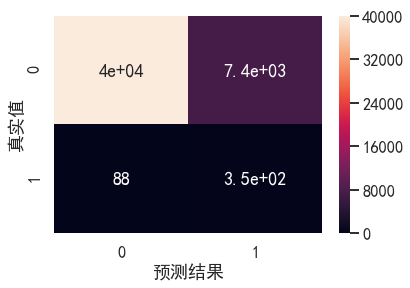

In [321]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report,confusion_matrix
plt.rcParams['font.family'] = 'SimHei' 

y_pred_t = best_est.predict(original_Xtest)




print("\n\n目标变量分布:")
print("------------------------------")

zc = original_ytest[original_ytest == 0].shape[0]
yq = original_ytest[original_ytest == 1].shape[0]
print("训练集：逾期笔数:{} 正常笔数:{}".format(yq,zc))
print('正常贷款：', round(zc/len(original_ytest) * 100,2), '% of the dataset')
print('逾期贷款：', round(yq/len(original_ytest) * 100,2), '% of the dataset')

pred_zc = y_pred_t[y_pred_t == 0].shape[0]
pred_yq = y_pred_t[y_pred_t == 1].shape[0]
print("预测结果：逾期笔数:{} 正常笔数:{}".format(pred_yq,pred_zc))
print('预测正常贷款：', round(pred_zc/len(y_pred_t) * 100,2), '% of the dataset')
print('预测逾期贷款：', round(pred_yq/len(y_pred_t) * 100,2), '% of the dataset')



print("\n\n训练结果精度:")
print("------------------------------")
print("TEST accuracy_score:{}".format(accuracy_score(original_ytest, y_pred_t)))
print("TEST precision_score:{}".format(precision_score(original_ytest, y_pred_t)))
print("TEST recall_score:{}".format(recall_score(original_ytest, y_pred_t)))
print("TEST AUC:{}".format(roc_auc_score(original_ytest, y_pred_t)))
print("每个类别的精确率和召回率：\n", classification_report(original_ytest, y_pred_t))
print("混淆矩阵：\n", confusion_matrix(original_ytest, y_pred_t))
C2 = confusion_matrix(original_ytest, y_pred_t)
sns.heatmap(C2,annot=True)

plt.xlabel("预测结果",fontsize=18)
plt.ylabel("真实值",fontsize=18)


In [45]:
347/(88+347)

0.7977011494252874

In [193]:
#将模型保存
saveModel =open(path+'BFC_Model_Normal_AUC_0.82.pkl','wb+')
pickle.dump(best_est,saveModel)
saveModel.close()

In [194]:
#验证一下保存的模型是否一致

modelFile =open(path+'BFC_Model_Normal_AUC_0.82.pkl','rb+')
BFC_Model = pickle.load(modelFile)
modelFile.close()

y_pred_1 = best_est.predict(original_Xtest)
print("TEST AUC:{}".format(roc_auc_score(original_ytest, y_pred_1)))

TEST AUC:0.8274189754356966


#### 将模型应用在测试数据集上

In [105]:
X.shape

(132029, 258)

In [106]:
print(X.columns.to_list())

['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78', 'isNew', 'lmt_Bin_WOE', 'certId_br_encoding_Bin_WOE', 'dist_br_encoding_Bin_WOE', 'certValidBegin_br_encoding_Bin_WOE', 'certValidStop_br_encoding_Bin_WOE', 'ethnic_br_encoding_Bin_WOE', 'residentAddr_br_encoding_Bin_WOE', 'gender_1', 'gender_2', '5yearBadloan_0', '5yearBadloan_1', 'loanProduct_1', 'loanProduct_2', 'loanProduct_3', 'basicLevel_-999', 'basicLevel_1', 'basicLe

In [147]:
test_x.head()

,id,certId,loanProduct,gender,age,dist,edu,job,lmt,basicLevel,...,highestEdu,linkRela,setupHour,weekday,ncloseCreditCard,unpayIndvLoan,unpayOtherLoan,unpayNormalLoan,5yearBadloan,isNew
0,132030,541202,1,2,28,540100,0,3,9.963,1,...,-999,0,9,6,1,0,1,0,0,1
1,132031,733521,1,1,42,730900,0,6,0.730,1,...,-999,0,4,6,1,0,1,0,0,1
2,132032,710231,1,2,43,710100,0,2,5.768,1,...,-999,0,18,5,1,1,1,0,0,1
3,132033,722122,3,2,32,722120,0,4,17.233,1,...,-999,-999,6,5,1,0,1,1,0,1
4,132034,641723,1,2,22,641700,0,4,0.463,3,...,-999,1,4,6,0,0,0,0,0,1


##### 加载模型

In [ ]:
##第一步：完成数据预处理
####在实际工作中，可以只清洗模型实际使用的字段

In [ ]:
##第二步：变量衍生

In [273]:
##第三步：分箱并代入WOE值
modelFile =open(path+'BFC_Model_Normal_AUC_0.82.pkl','rb+')
BFC_Model = pickle.load(modelFile)
modelFile.close()


file1 = open(path+'merge_bin_dict.pkl','rb+')
merge_bin_dict = pickle.load(file1)
file1.close()

file2 = open(path+'br_encoding_dict.pkl','rb+')
br_encoding_dict = pickle.load(file2)
file2.close()
 
file3 = open(path+'continous_merged_dict.pkl','rb+')
continous_merged_dict = pickle.load(file3)
file3.close()
 
file4 = open(path+'WOE_dict.pkl','rb+')
WOE_dict = pickle.load(file4)
file4.close()

In [274]:
len(continous_merged_dict)

8

In [197]:
#fimpt = BFC_Model.feature_importances_
#print(fimpt)
#print(X.shape,fimpt.shape)

In [139]:
print(X.columns.tolist())

['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78', 'isNew', 'lmt_Bin_WOE', 'certId_br_encoding_Bin_WOE', 'dist_br_encoding_Bin_WOE', 'certValidBegin_br_encoding_Bin_WOE', 'certValidStop_br_encoding_Bin_WOE', 'ethnic_br_encoding_Bin_WOE', 'residentAddr_br_encoding_Bin_WOE', 'gender_1', 'gender_2', '5yearBadloan_0', '5yearBadloan_1', 'loanProduct_1', 'loanProduct_2', 'loanProduct_3', 'basicLevel_-999', 'basicLevel_1', 'basicLe

In [198]:
for col in X.columns.tolist():
    if col.find('_WOE') > -1:
        print(col)

lmt_Bin_WOE
certId_br_encoding_Bin_WOE
dist_br_encoding_Bin_WOE
certValidBegin_br_encoding_Bin_WOE
certValidStop_br_encoding_Bin_WOE
ethnic_br_encoding_Bin_WOE
residentAddr_br_encoding_Bin_WOE


In [199]:
nonm_features

['gender',
 '5yearBadloan',
 'loanProduct',
 'basicLevel',
 'edu',
 'job',
 'cardname',
 'highestEdu',
 'linkRela',
 'ncloseCreditCard',
 'unpayIndvLoan',
 'unpayOtherLoan',
 'unpayNormalLoan']

In [200]:
print(test_x.columns.to_list())

['id', 'certId', 'loanProduct', 'gender', 'age', 'dist', 'edu', 'job', 'lmt', 'basicLevel', 'x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78', 'certValidBegin', 'certValidStop', 'ethnic', 'residentAddr', 'highestEdu', 'linkRela', 'setupHour', 'weekday', 'ncloseCreditCard', 'unpayIndvLoan', 'unpayOtherLoan', 'unpayNormalLoan', '5yearBadloan', 'isNew', 'cardname', 'cardtype']


##### 处理测试数据集

In [275]:
#def Onehot_enconding(df,col):
#    new_col_pref = col
#    old_cols = df.columns.to_list()
#    newcol = pd.get_dummies(df[col],prefix=new_col_pref)
#    df = pd.concat([df,newcol], axis=1)
#    new_cols = df.columns.to_list()
#    df.drop(columns=[col], axis=1, inplace=True)
#    
#    one_hot_col = list ( set(new_cols) - set(old_cols) )
#    return df,one_hot_col


#test_x = test_x.copy()
one_hot_cols = []
for col in nonm_features:
    test_x,cols = Onehot_enconding(test_x, col)
    #one_hot_cols.append(cols)
    one_hot_cols = one_hot_cols + cols

print(one_hot_cols)
test_x.head()

['gender_1', 'gender_2', '5yearBadloan_1', '5yearBadloan_0', 'loanProduct_1', 'loanProduct_2', 'loanProduct_3', 'basicLevel_4', 'basicLevel_2', 'basicLevel_3', 'basicLevel_1', 'edu_-999', 'edu_47', 'edu_0', 'edu_20', 'edu_70', 'edu_10', 'edu_60', 'edu_30', 'edu_40', 'job_5', 'job_8', 'job_6', 'job_14', 'job_4', 'job_2', 'job_1', 'job_12', 'job_3', 'job_9', 'job_10', 'job_7', 'cardname_长城电子借记卡', 'cardname_银联IC普卡', 'cardname_阳光卡（银联卡）', 'cardname_专用惠农卡', 'cardname_联名IC卡普卡', 'cardname_金穗通宝银卡', 'cardname_龙卡通', 'cardname_龙卡储蓄卡（银联卡）', 'cardname_华夏普卡', 'cardname_薪资理财卡', 'cardname_', 'cardname_交银IC卡', 'cardname_借记IC个人金卡', 'cardname_IC绿卡通', 'cardname_IC联名卡', 'cardname_借记卡', 'cardname_普通高中学生资助卡', 'cardname_龙卡储蓄卡', 'cardname_金穗海通卡', 'cardname_金穗通宝钻石卡', 'cardname_乐当家白金卡', 'cardname_中信借记卡（银联卡）', 'cardname_发展卡（银联卡）', 'cardname_理财白金卡', 'cardname_借记IC白金卡', 'cardname_轻松理财普卡（复合卡）', 'cardname_理财宝IC卡', 'cardname_理财银卡', 'cardname_广发理财通卡', 'cardname_牡丹卡普卡', 'cardname_新磁条借记卡', 'cardname_灵通卡', 'cardname_一卡通（银联

,id,certId,age,dist,lmt,x_0,x_1,x_2,x_3,x_4,...,ethnic_28,ethnic_29,ethnic_31,ethnic_32,ethnic_33,ethnic_34,ethnic_36,ethnic_38,ethnic_39,ethnic_40
0,132030,541202,28,540100,9.963,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,132031,733521,42,730900,0.730,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,132032,710231,43,710100,5.768,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,132033,722122,32,722120,17.233,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,132034,641723,22,641700,0.463,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [202]:
for col in X.columns.tolist():
    if col.find('_WOE') > -1:
        print(col)

lmt_Bin_WOE
certId_br_encoding_Bin_WOE
dist_br_encoding_Bin_WOE
certValidBegin_br_encoding_Bin_WOE
certValidStop_br_encoding_Bin_WOE
ethnic_br_encoding_Bin_WOE
residentAddr_br_encoding_Bin_WOE


In [150]:
"certId_br_encoding_Bin_WOE".split('_')[0]

'certId'

In [276]:
WOE_cols = []
for col in X.columns.tolist():
    if col.find('_WOE') > -1:
        #WOE_cols.append(col.split('_')[0])
        WOE_cols.append(col)
print(WOE_cols)

['lmt_Bin_WOE', 'certId_br_encoding_Bin_WOE', 'dist_br_encoding_Bin_WOE', 'certValidBegin_br_encoding_Bin_WOE', 'certValidStop_br_encoding_Bin_WOE', 'residentAddr_br_encoding_Bin_WOE']


In [277]:
##original_Xtest
from utils import ModifyDf
testData =  test_x.copy()

for var in WOE_cols:    
    print("begin solve:",var)
    #var1 = var.replace('_Bin_WOE','')
    if var.find('_Bin_WOE')>-1:
        #print("match _Bin_WOE")
        var1 = var.replace('_Bin_WOE','')
    elif var.find('_WOE')>-1:
        #print("match _WOE")
        var1 = var.replace('_WOE','')
    else:
        print("match nothing {}".format(var))
        
    print("after replace:",var1)

    #(1) 分类变量（取值< 5）
    # 有些取值个数少、但是需要合并的变量
    if var1 in merge_bin_dict.keys():
        print("{} need to be regrouped".format(var1))
        testData[var1 + '_Bin'] = testData[var1].map(merge_bin_dict[var1])
        testData.drop(columns=[var1],axis=1,inplace=True)

    elif var1 in continous_merged_dict.keys():
        #(2) 分类变量（取值> 5）
        # 有些变量需要用bad rate进行编码
        if var1.find('_br_encoding')>-1:
            var2 =var1.replace('_br_encoding','')
            print("{} need to be encoded by bad rate".format(var2))
            testData[var1] = testData[var2].map(br_encoding_dict[var2])
            #需要注意的是，有可能在测试样中某些值没有出现在训练样本中，从而无法得出对应的bad rate是多少。
            #故可以用最坏（即最大）的bad rate进行编码
            max_br = max(testData[var1])
            testData[var1] = testData[var1].map(lambda x: ModifyDf(x, max_br))
            testData.drop(columns=[var2],axis=1,inplace=True)

        #(3) 连续变量
        #上述处理后，需要加上连续型变量一起进行分箱
        if -999 not in set(testData[var1]):
            print("-999 not in testset",var1)
            testData[var1+'_Bin'] = testData[var1].map(lambda x: AssignBin(x, continous_merged_dict[var1]))
            testData.drop(columns=[var1],axis=1,inplace=True)
        else:
            print("-999 is in testset",var1)
            testData[var1 + '_Bin'] = testData[var1].map(lambda x: AssignBin(x, continous_merged_dict[var1],[-1,-999]))
            testData.drop(columns=[var1],axis=1,inplace=True)

    #WOE编码
    var3 = var.replace('_WOE','')
    testData[var] = testData[var3].map(WOE_dict[var3])
    testData.drop(columns=[var3],axis=1,inplace=True)

begin solve: lmt_Bin_WOE
after replace: lmt
-999 not in testset lmt
begin solve: certId_br_encoding_Bin_WOE
after replace: certId_br_encoding
certId need to be encoded by bad rate
-999 not in testset certId_br_encoding
begin solve: dist_br_encoding_Bin_WOE
after replace: dist_br_encoding
dist need to be encoded by bad rate
-999 not in testset dist_br_encoding
begin solve: certValidBegin_br_encoding_Bin_WOE
after replace: certValidBegin_br_encoding
certValidBegin need to be encoded by bad rate
-999 not in testset certValidBegin_br_encoding
begin solve: certValidStop_br_encoding_Bin_WOE
after replace: certValidStop_br_encoding
certValidStop need to be encoded by bad rate
-999 not in testset certValidStop_br_encoding
begin solve: residentAddr_br_encoding_Bin_WOE
after replace: residentAddr_br_encoding
residentAddr need to be encoded by bad rate
-999 not in testset residentAddr_br_encoding


In [278]:
print(testData.columns.tolist())

['id', 'age', 'x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78', 'setupHour', 'isNew', 'cardtype', 'gender_1', 'gender_2', '5yearBadloan_0', '5yearBadloan_1', 'loanProduct_1', 'loanProduct_2', 'loanProduct_3', 'basicLevel_1', 'basicLevel_2', 'basicLevel_3', 'basicLevel_4', 'edu_-999', 'edu_0', 'edu_10', 'edu_20', 'edu_30', 'edu_40', 'edu_47', 'edu_60', 'edu_70', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', '

In [279]:
train_WOE_cols = []
test_WOE_cols = []
for col in X.columns.tolist():
    if col.find('_WOE') > -1:
        train_WOE_cols.append(col)
        
for col in testData.columns.tolist():
    if col.find('_WOE') > -1:
        test_WOE_cols.append(col)    

print(set(train_WOE_cols) - set(test_WOE_cols))
print(set(test_WOE_cols) - set(train_WOE_cols))
print(len(test_WOE_cols) - len(train_WOE_cols))

set()
set()
0


In [280]:
col_not_in_testset = []
test_X = test_x[['id']]
for col in X.columns:
    #print("do  {} .....".format(col))
    if col in testData.columns:
        test_X[col] = testData[col]
    else:
        test_X[col] = 0 
        col_not_in_testset.append(col)
test_X.drop(columns=['id'], axis=1, inplace=True)
print("columns not in test data set is [ {} ]".format(col_not_in_testset))

columns not in test data set is [ ['basicLevel_-999', 'basicLevel_5', 'job_11', 'job_13', 'job_16', 'cardname_一账通借贷合一卡金卡', 'cardname_中信理财宝白金卡', 'cardname_乐当家', 'cardname_乐当家金卡VISA', 'cardname_兴业卡（银联卡）', 'cardname_华夏丽人卡（银联卡）', 'cardname_华夏卡（银联卡）', 'cardname_华夏至尊金卡（银联卡）', 'cardname_华夏金卡', 'cardname_发展借记卡（银联卡）', 'cardname_太平洋万事顺卡', 'cardname_太平洋互连卡', 'cardname_平安银行（深圳发展银行）借记卡', 'cardname_招行国际卡（银联卡）', 'cardname_民生借记卡', 'cardname_理财金账户金卡', 'cardname_社会保障IC卡', 'cardname_社保联名卡', 'cardname_绿卡（银联卡）', 'cardname_财富卡私人银行卡', 'cardname_轻松理财消贷易卡', 'cardname_轻松理财白金卡（复合卡）', 'cardname_退役金卡', 'highestEdu_50', 'linkRela_301', 'ethnic_25', 'ethnic_30', 'ethnic_35', 'ethnic_37', 'ethnic_41', 'ethnic_42', 'ethnic_43', 'ethnic_44', 'ethnic_45', 'ethnic_46', 'ethnic_47', 'ethnic_48'] ]


In [281]:
test_X.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,ethnic_39,ethnic_40,ethnic_41,ethnic_42,ethnic_43,ethnic_44,ethnic_45,ethnic_46,ethnic_47,ethnic_48
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [282]:
print(X.shape)
print(test_x.shape)
print(test_X.shape)  

(132029, 312)
(23561, 280)
(23561, 312)


In [210]:
print(X.columns.to_list())

['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78', 'lmt_Bin_WOE', 'certId_br_encoding_Bin_WOE', 'dist_br_encoding_Bin_WOE', 'certValidBegin_br_encoding_Bin_WOE', 'certValidStop_br_encoding_Bin_WOE', 'ethnic_br_encoding_Bin_WOE', 'residentAddr_br_encoding_Bin_WOE', 'gender_1', 'gender_2', '5yearBadloan_0', '5yearBadloan_1', 'loanProduct_1', 'loanProduct_2', 'loanProduct_3', 'basicLevel_-999', 'basicLevel_1', 'basicLevel_2', '

In [211]:
print(test_X.columns.to_list())

['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78', 'lmt_Bin_WOE', 'certId_br_encoding_Bin_WOE', 'dist_br_encoding_Bin_WOE', 'certValidBegin_br_encoding_Bin_WOE', 'certValidStop_br_encoding_Bin_WOE', 'ethnic_br_encoding_Bin_WOE', 'residentAddr_br_encoding_Bin_WOE', 'gender_1', 'gender_2', '5yearBadloan_0', '5yearBadloan_1', 'loanProduct_1', 'loanProduct_2', 'loanProduct_3', 'basicLevel_-999', 'basicLevel_1', 'basicLevel_2', '

##### 用训练好的模型预测

In [283]:
#y_pred = BFC_Model.predict(test_X)
y_pred = best_est.predict(test_X)
print(y_pred.shape)

(23561,)


In [284]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [285]:
print(test_x.shape)
print(y_pred.shape)

(23561, 280)
(23561,)


In [286]:
y_pred_0 = pd.DataFrame(y_pred, columns=['target'])
y_pred_0.insert(0,'id',test_x.id)
y_pred_0.to_csv('sub_brfc_lable_2019_11_07.csv', index=False)
y_pred_0.head()

,id,target
0,132030,0
1,132031,0
2,132032,0
3,132033,0
4,132034,1


In [287]:
#y_pred_0.target.vaue_counts()
#type(y_pred_0)
y_pred_0.target.value_counts()

0    19473
1     4088
Name: target, dtype: int64

8328

In [300]:
#检查预测结果的lable分布

# The classes are heavily skewed we need to solve this issue later.
print("原始训练集:")
print("------------------------------")
print('正常贷款：', round(train_y['target'].value_counts()[0]/len(train_y) * 100,2), '% of the dataset')
print('逾期贷款：', round(train_y['target'].value_counts()[1]/len(train_y) * 100,2), '% of the dataset')


print("\n\n训练结果:")
print("------------------------------")

zc = original_ytest[original_ytest == 0].shape[0]
yq = original_ytest[original_ytest == 1].shape[0]
print('正常贷款：', round(zc/len(y_pred_1) * 100,2), '% of the dataset')
print('逾期贷款：', round(yq/len(y_pred_1) * 100,2), '% of the dataset')

pred_zc = y_pred_1[y_pred_1 == 0].shape[0]
pred_yq = y_pred_1[y_pred_1 == 1].shape[0]
print('预测正常贷款：', round(pred_zc/len(y_pred_1) * 100,2), '% of the dataset')
print('预测逾期贷款：', round(pred_yq/len(y_pred_1) * 100,2), '% of the dataset')


print("\n\n提交测试集:")
print("------------------------------")
print('正常贷款：', round(y_pred_0['target'].value_counts()[0]/len(y_pred_0) * 100,2), '% of the dataset')
print('逾期贷款：', round(y_pred_0['target'].value_counts()[1]/len(y_pred_0) * 100,2), '% of the dataset')

原始训练集:
------------------------------
正常贷款： 99.27 % of the dataset
逾期贷款： 0.73 % of the dataset


训练结果:
------------------------------
正常贷款： 99.09 % of the dataset
逾期贷款： 0.91 % of the dataset
预测正常贷款： 82.59 % of the dataset
预测逾期贷款： 17.41 % of the dataset


提交测试集:
------------------------------
正常贷款： 82.65 % of the dataset
逾期贷款： 17.35 % of the dataset


### LGBMClassifier

In [200]:
from imblearn.pipeline import make_pipeline

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# machine learning: XGB
import xgboost as xgb
import lightgbm as lgb



def run_lgb(train_X, train_y, val_X, val_y):
    params = {
        "objective" : "binary",
        "boosting_type": "gbdt",
        "metric" : "auc",
        "num_leaves" : 100,
        "learning_rate" : 0.05,
        "bagging_fraction" : 0.6,
        "feature_fraction" : 0.6,
        "bagging_frequency" : 6,
        "bagging_seed" : 42,
        "max_bin": 512,
        "verbosity" : -1,
        "seed": 42
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    evals_result = {}
    model = lgb.train(params, lgtrain, 5000, 
                      valid_sets=[lgtrain, lgval], 
                      early_stopping_rounds=100, 
                      verbose_eval=150, 
                      evals_result=evals_result)
    
    #pred_test_y = np.expm1(model.predict(test_X, num_iteration=model.best_iteration))
    return model, evals_result

In [201]:

sm = SMOTE(sampling_strategy='minority',random_state=42)
original_Xtrain_res, original_ytrain_res = sm.fit_resample(original_Xtrain, original_ytrain)

print('Resampled dataset shape %s' % Counter(original_ytrain_res))
model_lgb, evals_result = run_lgb(original_Xtrain_res, original_ytrain_res, original_Xtest, original_ytest)

Resampled dataset shape Counter({0: 117963, 1: 117963})
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[41]	training's auc: 0.999568	valid_1's auc: 0.889576


In [203]:
print("roc_auc_score: \n {}\n".format(roc_auc_score(original_ytest, model_lgb.predict(original_Xtest))))
print("LightGBM Training Completed")

roc_auc_score: 
 0.889576339614964

LightGBM Training Completed


In [204]:
test_X.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,ncloseCreditCard_1,unpayIndvLoan_-999,unpayIndvLoan_0,unpayIndvLoan_1,unpayOtherLoan_-999,unpayOtherLoan_0,unpayOtherLoan_1,unpayNormalLoan_-999,unpayNormalLoan_0,unpayNormalLoan_1
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [213]:
y_pred_lgb = model_lgb.predict(test_X)
y_pred_lgb = pd.DataFrame(y_pred_lgb, columns=['target'])
y_pred_lgb.insert(0,'id',test_x.id)
y_pred_lgb['target'] = y_pred_lgb['target'].apply(lambda x:1 if x>=0.2 else 0)

In [215]:
print(y_pred_lgb.target.value_counts())

0    21715
1     1846
Name: target, dtype: int64


In [216]:
t_0_ = train_y.target.value_counts()[0] 
t_1_ = train_y.target.value_counts()[1] 

print("train default ratio:{}".format(t_1_ / (t_0_ + t_1_)) )

p_0_ = y_pred_lgb.target.value_counts()[0] 
p_1_ = y_pred_lgb.target.value_counts()[1] 

print("test default ratio:{}".format(p_1_ / (p_0_ + p_1_)) )

train default ratio:0.0072635557339675375
test default ratio:0.07834981537286194


In [218]:
y_pred_lgb.to_csv('sub_lgbm_lable_2019_11_06.csv', index=False)
y_pred_lgb.head()

,id,target
0,132030,0
1,132031,0
2,132032,0
3,132033,0
4,132034,0


## 参考链接

- 信息价值（IV）和证据权重（WOE）–来自银行业的案例研究（第4部分），http://ucanalytics.com/blogs/information-value-and-weight-of-evidencebanking-case/
- python-申请评分卡模型，https://www.jianshu.com/p/eaf80fcaeed0
- credit-fraud-dealing-with-imbalanced-datasets，https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets#notebook-container